In [24]:
import multiprocessing as mp                                                                                                                                                                                       
import os                                                                                                                                                                                                          
import numpy as np                                                                                                                                                                                                 
import awkward as ak                                                                                                                                                                                               
import matplotlib.pyplot as plt                                                                                                                                                                                    
import matplotlib                                                                                                                                                                                                  
import matplotlib.colors as colors                                                                                                                                                                                 
from tools.roottree import read_tree                                                                                                                                                                               
from tools.selections import *                                                                                                                                                                                     
import scipy.stats                                                                                                                                                                                                 
from scipy.optimize import curve_fit                                                                                                                                                                               
                                                                                                                   
from tools.plottools import plot1dhist, plot2dhist, plot1d_errorbar, FIGSIZE_MID, FIGSIZE_BIG, setplot_defaultstyle, format_order_of_magnitude, FONTSIZE                                                           
from tools.studybeta import calc_signal_fraction                                                                                
from tools.binnings_collection import fbinning_fraction, fbinning_RICHnpe                                                                                                                                          
from tools.binnings_collection import get_nbins_in_range, get_sub_binning, get_bin_center                                                                                                                          
from tools.studybeta import minuitfit_LL, cdf_gaussian, calc_signal_fraction, cdf_double_gaus, double_gaus, minuitfit_Chi
from tools.histograms import WeightedHistogram, Histogram, plot_histogram_2d, plot_histogram_1d   
from tools.plottools import plot1dhist, plot2dhist, plot1d_errorbar, savefig_tofile, setplot_defaultstyle, FIGSIZE_BIG, FIGSIZE_SQUARE, FIGSIZE_MID, FIGSIZE_WID, plot1d_step, FONTSIZE, set_plot_defaultstyle  
from tools.constants import ISOTOPES_MASS, NUCLEI_CHARGE, NUCLEIS, ISOTOPES
from tools.functions import cumulative_norm_gaus, normalized_gaussian, poly, upoly
from tools.graphs import MGraph, slice_graph, plot_graph, slice_graph_by_value, concatenate_graphs, Add_point_to_graph

from tools.constants import ISOTOPES_MASS, DETECTOR_COLOR
from tools.massfit_tools import get_fitpdferrorband, get_fitpdf_witherr
import uncertainties                                                                                                                                                                                               
from uncertainties import unumpy                                                                                                                                                                                   
from uncertainties import ufloat 
from tools.jupytertools import *

In [25]:
#filename_hist = '/home/manbing/Documents/Data/data_BeP8/RICHBeta/Be_richbetaResidual_refTrueBetaAtRICH_B1236P8_mcweight_finebin.npz'
#filename_hist = '/home/manbing/Documents/Data/data_BeP8/Be2DHist/BeMC_hist_BetaUntunedResoVsEkTrue.npz'
#filename_hist = '/home/manbing/Documents/Data/data_BeP8/Be2DHist/BeMC_hist_RICHBeta1VsEkinGenAtDec_finebin.npz'

#filename_hist = '/home/manbing/Documents/Data/data_BeP8/2DHist/BeMC_hist_RigBetaReso.npz'
filename_hist = '/home/manbing/Documents/Data/data_BeP8/Hist2D/BeMC_hist_RICHBeta2CorVsEkinGenAtDec_finebin.npz'
detectors = ['NaF', 'Agl']
hist_mcbeta = {}
hist_issbeta = {}
hist_issbeta_sv = {}
nuclei = 'Be'
isotopes = ISOTOPES[nuclei]
nucleiname = 'Be'
MCName = 'Be'
datadir = '/home/manbing/Documents/Data/data_BeP8/'
plotfile = '/home/manbing/Documents/lithiumanalysis/slides/plots/Study_RICHBeta_Resolution'
figsuffix = 'refRICHTuned'
isscolor = 'black'
mccolor = 'blue'
figtext = 'Tuned'

nucleiname = {'O': 'Oxygen', 'C':'Carbon', 'Be': 'Be', 'B': 'Boron', 'Li': 'Li'}
#MCName = 'O16 MC'
MCNameText = {'Be': 'Be MC(Be7:9:10=[6:3:1])', 'B': 'B MC(B10:B11=[1:1])', 'C': 'C12 MC', 'O': 'O16 MC', 'Li': 'Li MC(Li6:7=1:1)'}



[5.05987029e-01 6.08224869e-01 7.23982957e-01 8.53363359e-01
 1.00135025e+00 1.16308182e+00 1.34357172e+00 1.54285449e+00
 1.76088749e+00 2.00298668e+00 2.26917689e+00 2.55942404e+00
 2.87365792e+00 3.21734539e+00 3.59045802e+00 3.99294340e+00
 4.43035186e+00 4.90265349e+00 5.40980476e+00 5.97435537e+00
 6.53976838e+00 7.16250306e+00 7.84258384e+00 8.58001677e+00
 9.37479531e+00 1.02269048e+01 1.11363257e+01 1.21030364e+01
 1.31839123e+01 1.43220684e+01 1.55174754e+01 1.68270510e+01
 1.81938495e+01 1.96748100e+01 2.12699342e+01 2.29792203e+01
 2.48026637e+01 2.67402582e+01 2.88489916e+01 3.10718692e+01
 3.34658838e+01 3.60310351e+01 3.88243285e+01 4.17887578e+01
 4.49813296e+01 4.84020436e+01 5.21079126e+01 5.60989378e+01
 6.06602002e+01 6.52215404e+01 7.03531224e+01 7.60549540e+01
 8.28972329e+01 9.03097796e+01 9.88627956e+01 1.08556291e+02
 1.19390271e+02 1.31934951e+02 1.46760558e+02 1.65007539e+02
 1.87246131e+02 2.15187017e+02 2.50540886e+02 2.98439782e+02
 3.75420298e+02 5.008702

/tmp/ipykernel_51530/2858461768.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plot.set_xlim([0, 120])


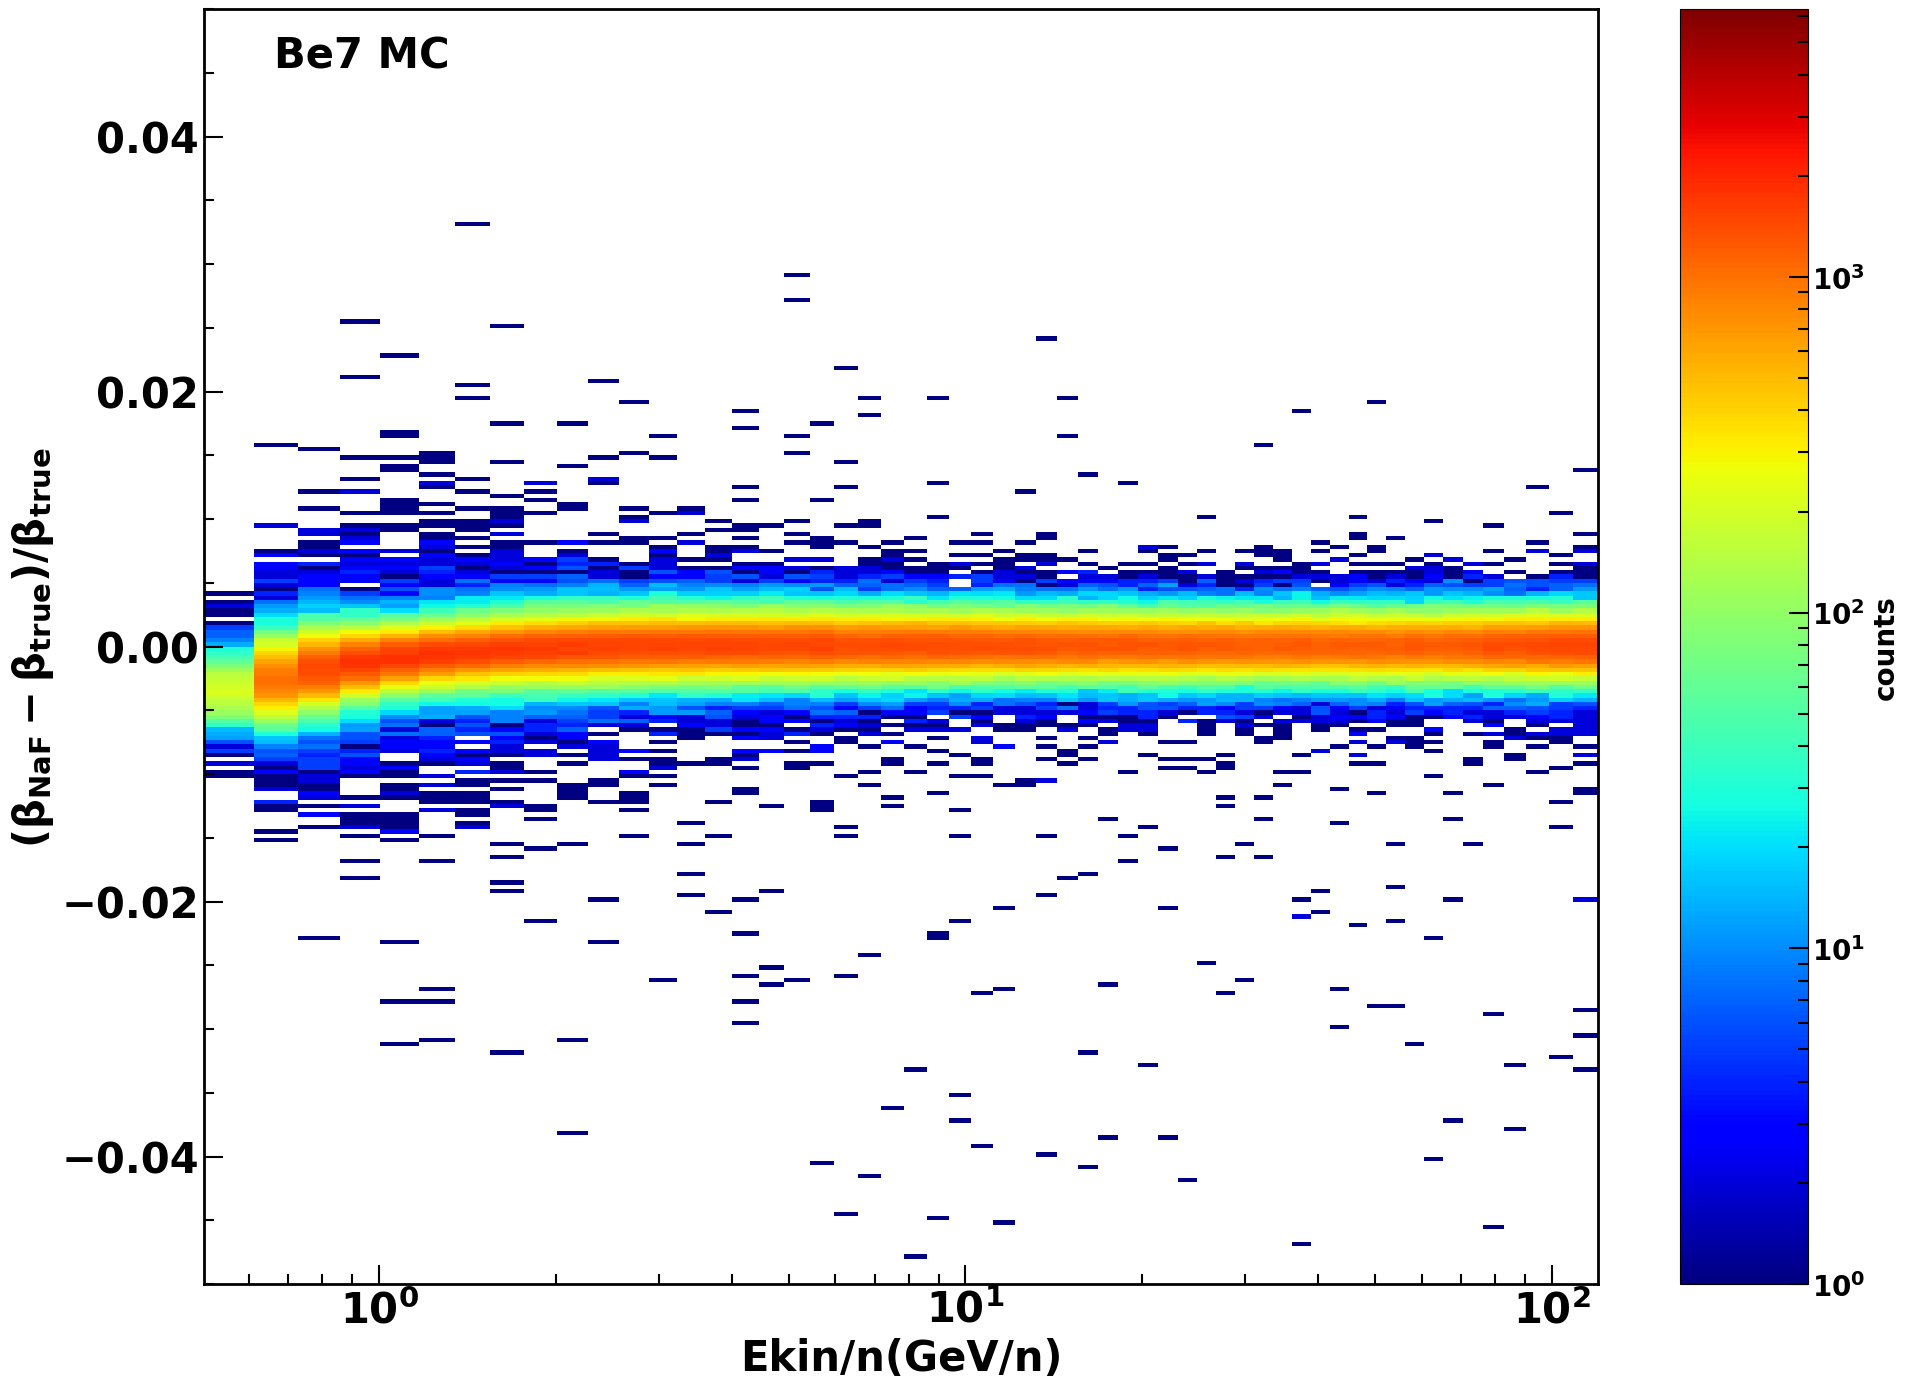

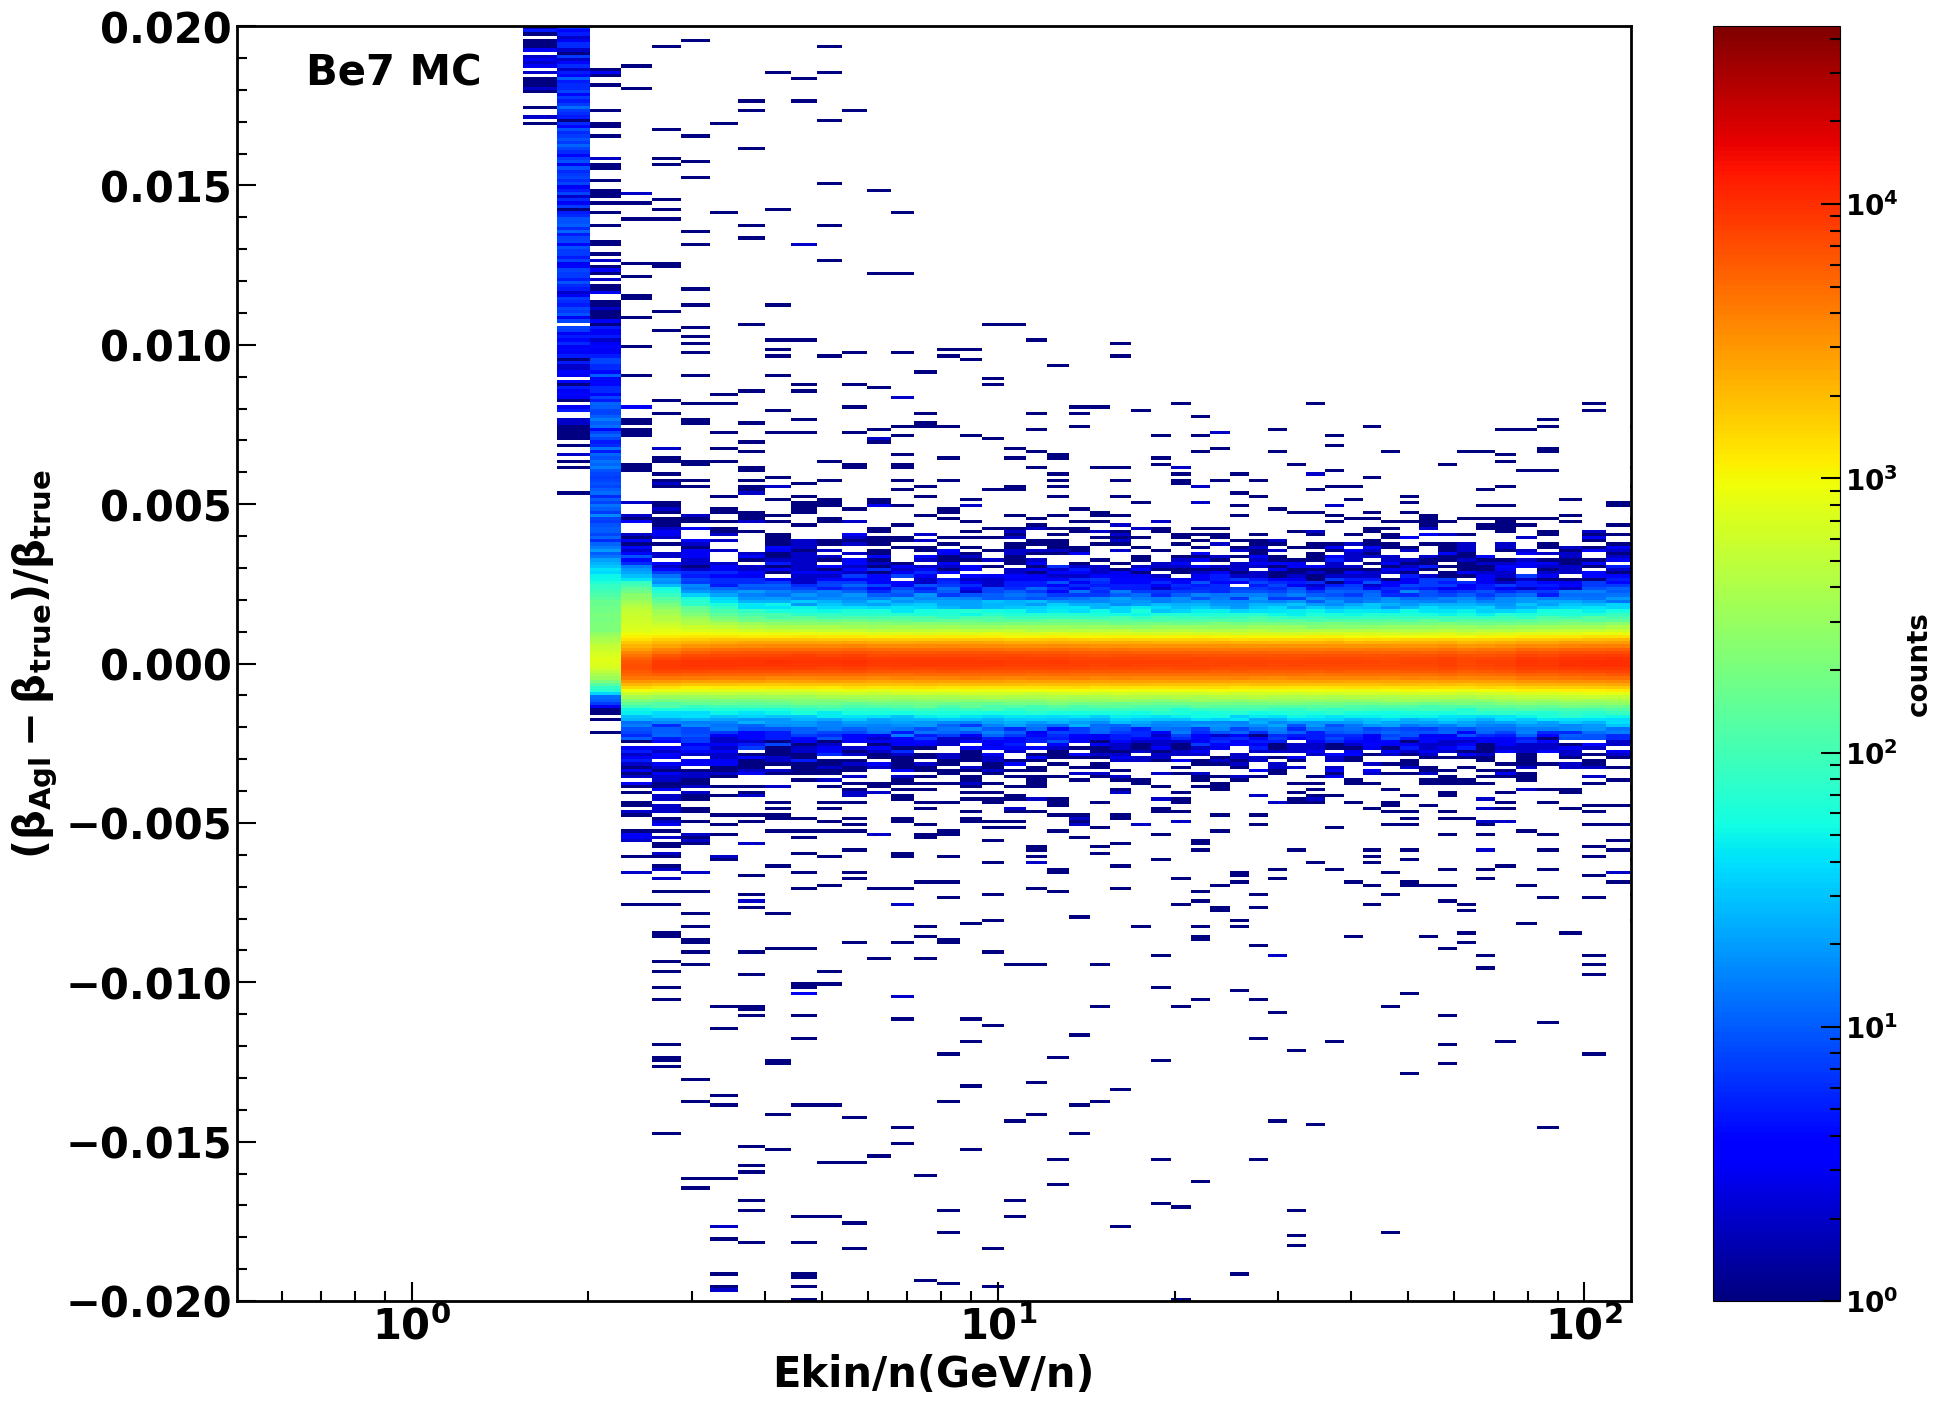

In [26]:

datatype = {'iss', 'mc'}
decs = ['NaF', 'Agl']

hist2d_iss = {}
hist2d_mc = {}
iso = 'Be7'
for dec in decs: 
    npzfile = np.load(f'{filename_hist}')
    #hist2d_iss[dec] = WeightedHistogram.from_file(npzfile, f"hist2d_beta_residual_{dec}{iso}") 
    hist2d_mc[dec] = WeightedHistogram.from_file(npzfile, f"hist2d_beta_resolution_{dec}{iso}")  
    fig = plt.figure(figsize=(20, 15))
    plot = fig.subplots(1, 1) 
    plot2dhist(fig, plot, xbinning=hist2d_mc[dec].binnings[0].edges[1:-1], 
                ybinning=hist2d_mc[dec].binnings[1].edges[1:-1], 
                counts=hist2d_mc[dec].values[1:-1, 1:-1], 
                xlabel=None, ylabel=None, zlabel="counts", zmin=None, zmax=None, 
                setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False,  setlogz=True)  
    print(hist2d_mc[dec].binnings[0].edges[1:-1])
    plot.text(0.05, 0.98, f"{iso} MC", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=plot.transAxes, color="black", fontweight="bold")          
    plot.set_xlabel(r"Ekin/n(GeV/n)", fontsize=30)                                                                                                                                                     
    plot.set_ylabel(rf'$\mathrm{{(\beta_{{{dec}}}-\beta_{{true}})/\beta_{{true}} }}$', fontsize=30)
    #plot.set_ylabel(rf'$\mathrm{{ (\beta_{{tof}}-\beta_{{{dec}}})/\beta_{{{dec}}}}}$', fontsize=30)
    plot.set_xscale('log')
    plot.set_xlim([0, 120])
    #savefig_tofile(fig, plotfile, f"hist2dResidual_{figsuffix}_{nucleiname}{dec}", show=True) 
    
  
            
            


[  1.08221604   1.25332677   1.4432131    1.65187099   1.88193708
   2.13608179   2.41430047   2.71654098   3.04550165   3.4039017
   3.79170071   4.21164763   4.66650268   5.15622913   5.69208007
   6.25706188   6.85113572   7.50254345   8.2113003    8.97740604
   9.80085004  10.68161524  11.61968104  12.64347431  13.75299035
  14.91977191  16.1722632   17.51045027  18.93432975  20.4723721
  22.12457727  23.89094199  25.77146093  27.7946249   29.96043043
  32.26887651  34.74845947  37.42768181  40.30654314  43.38504368
  46.69168659  50.25497811  54.10342518  58.37956899  62.94087031
  67.7873314   73.20403822  79.47609347  86.60350624  94.58628761
 103.70954324 113.97328073 125.66261106]
[  3.79170071   4.21164763   4.66650268   5.15622913   5.69208007
   6.25706188   6.85113572   7.50254345   8.2113003    8.97740604
   9.80085004  10.68161524  11.61968104  12.64347431  13.75299035
  14.91977191  16.1722632   17.51045027  18.93432975  20.4723721
  22.12457727  23.89094199  25.7714609

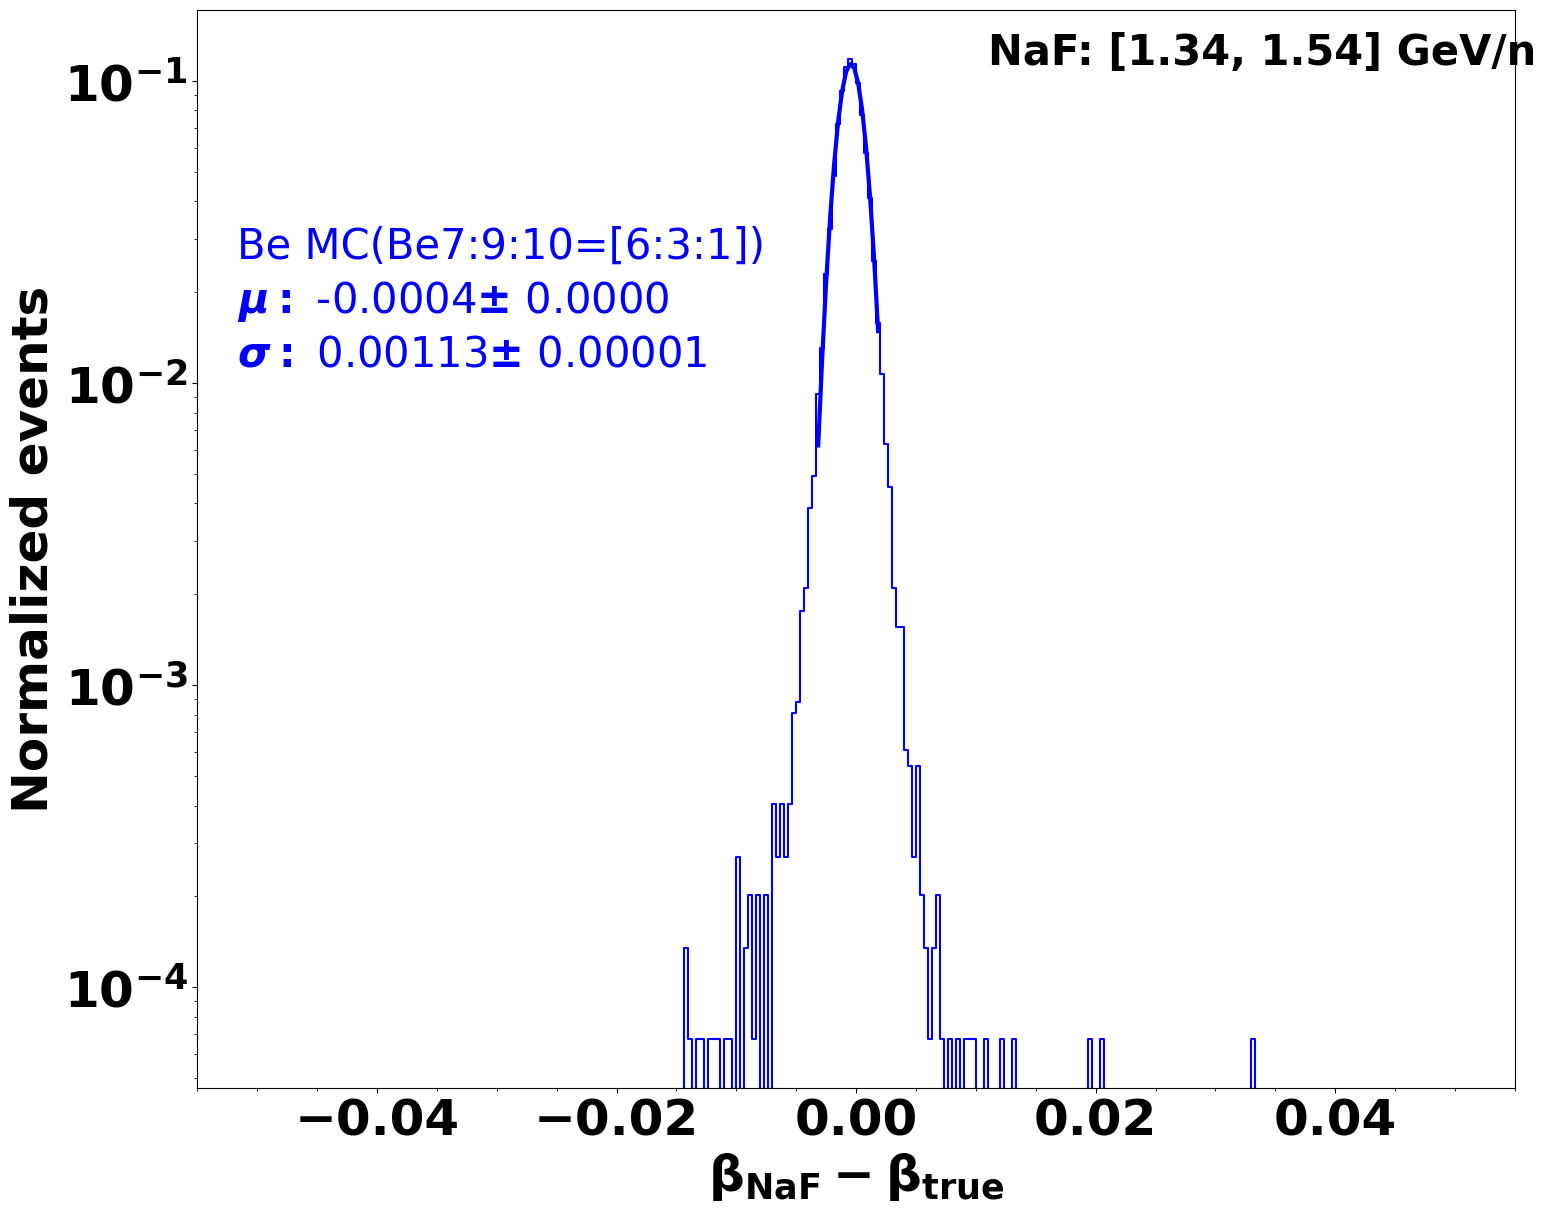

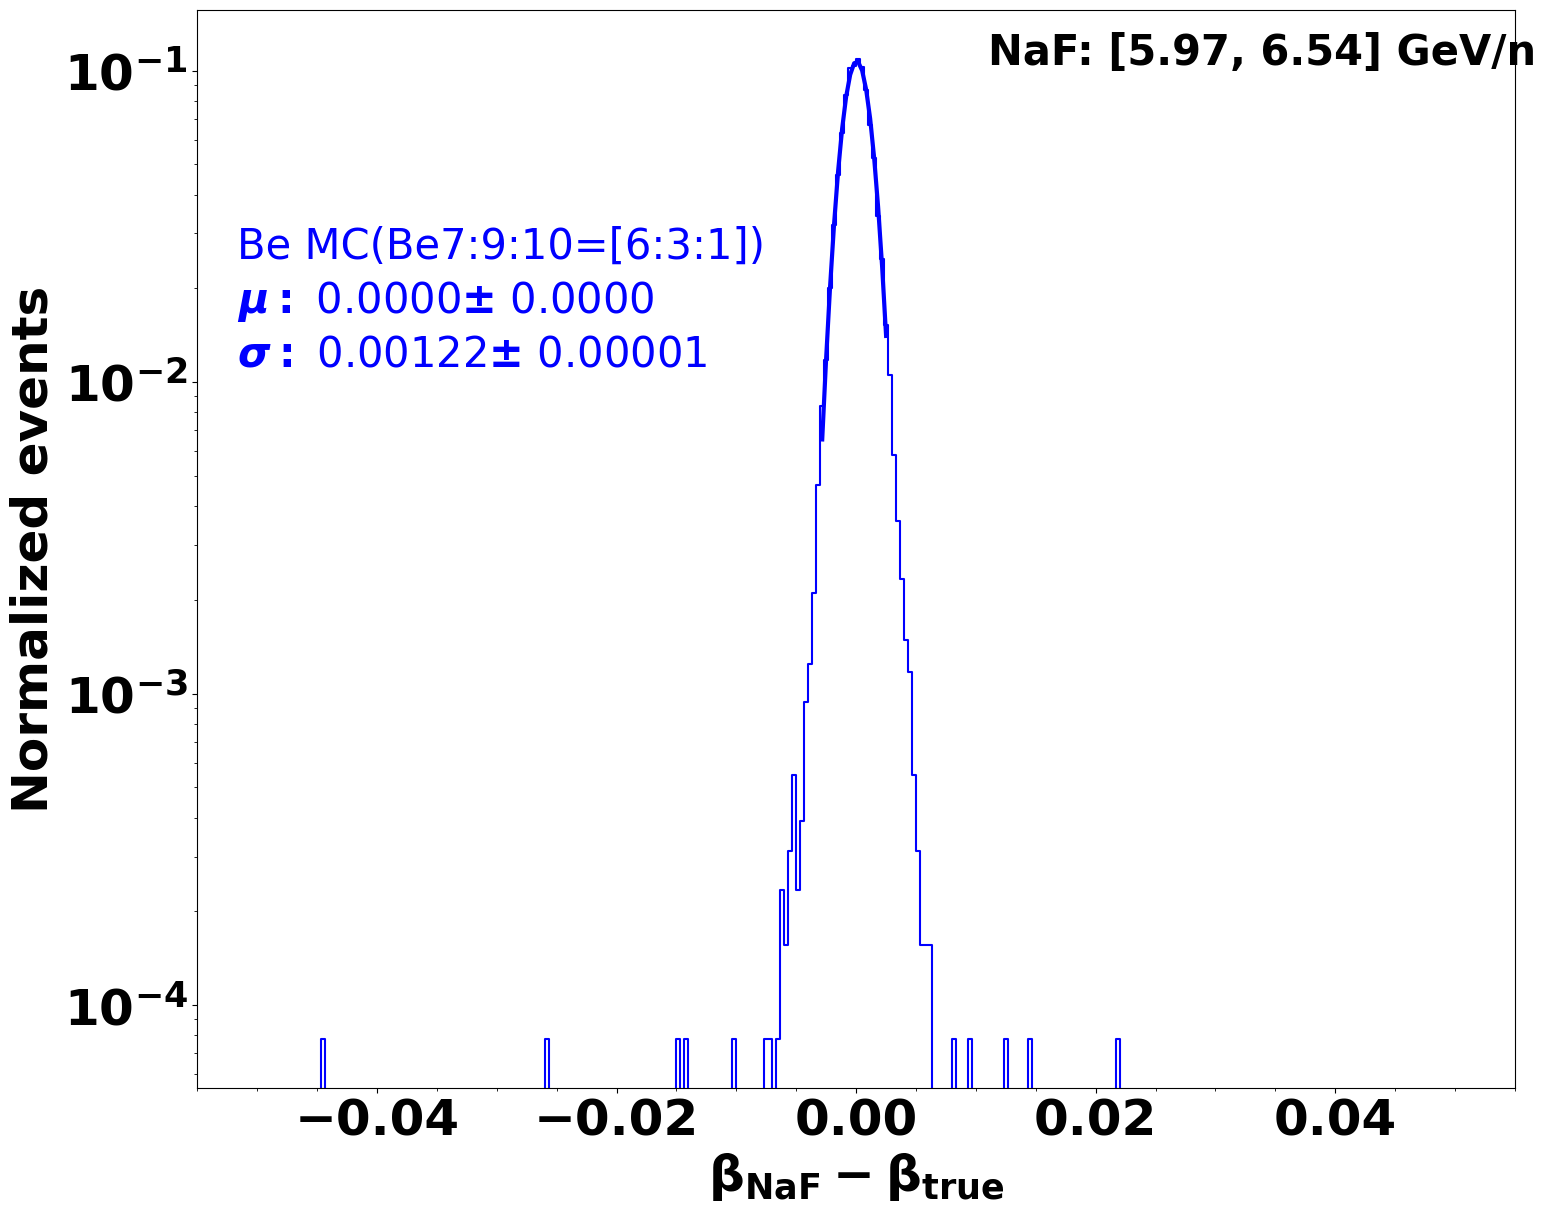

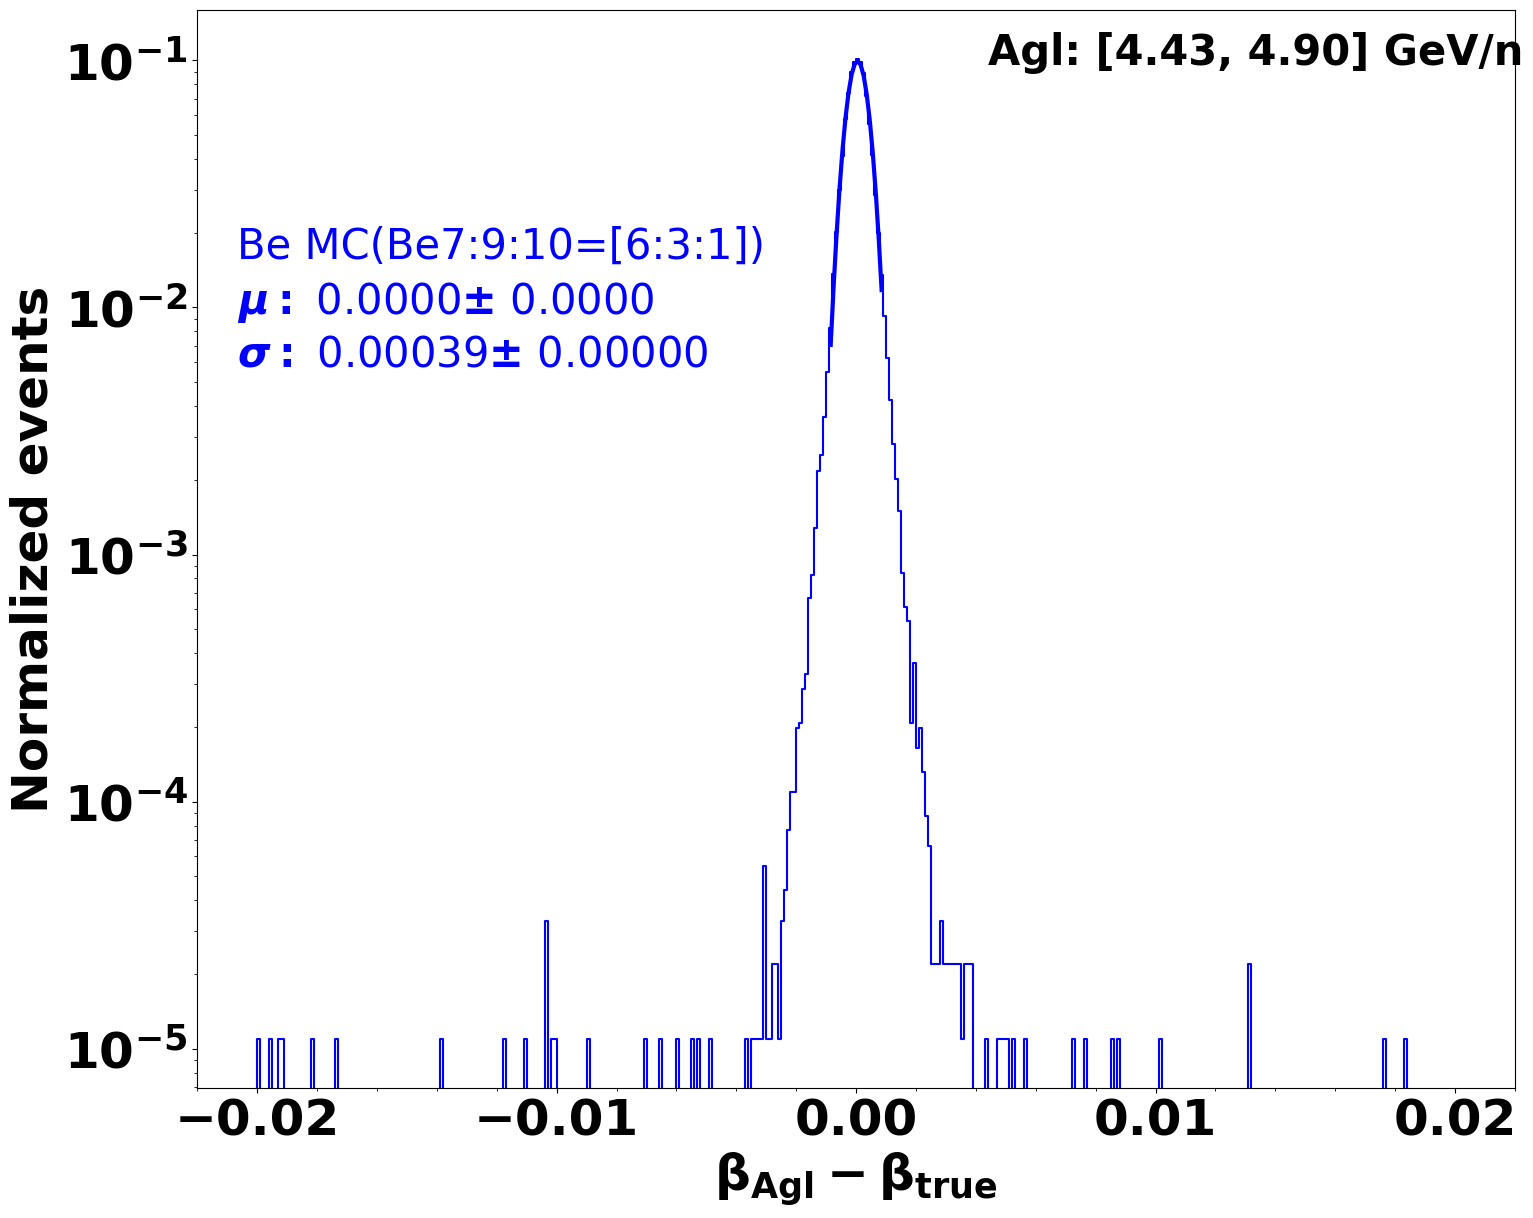

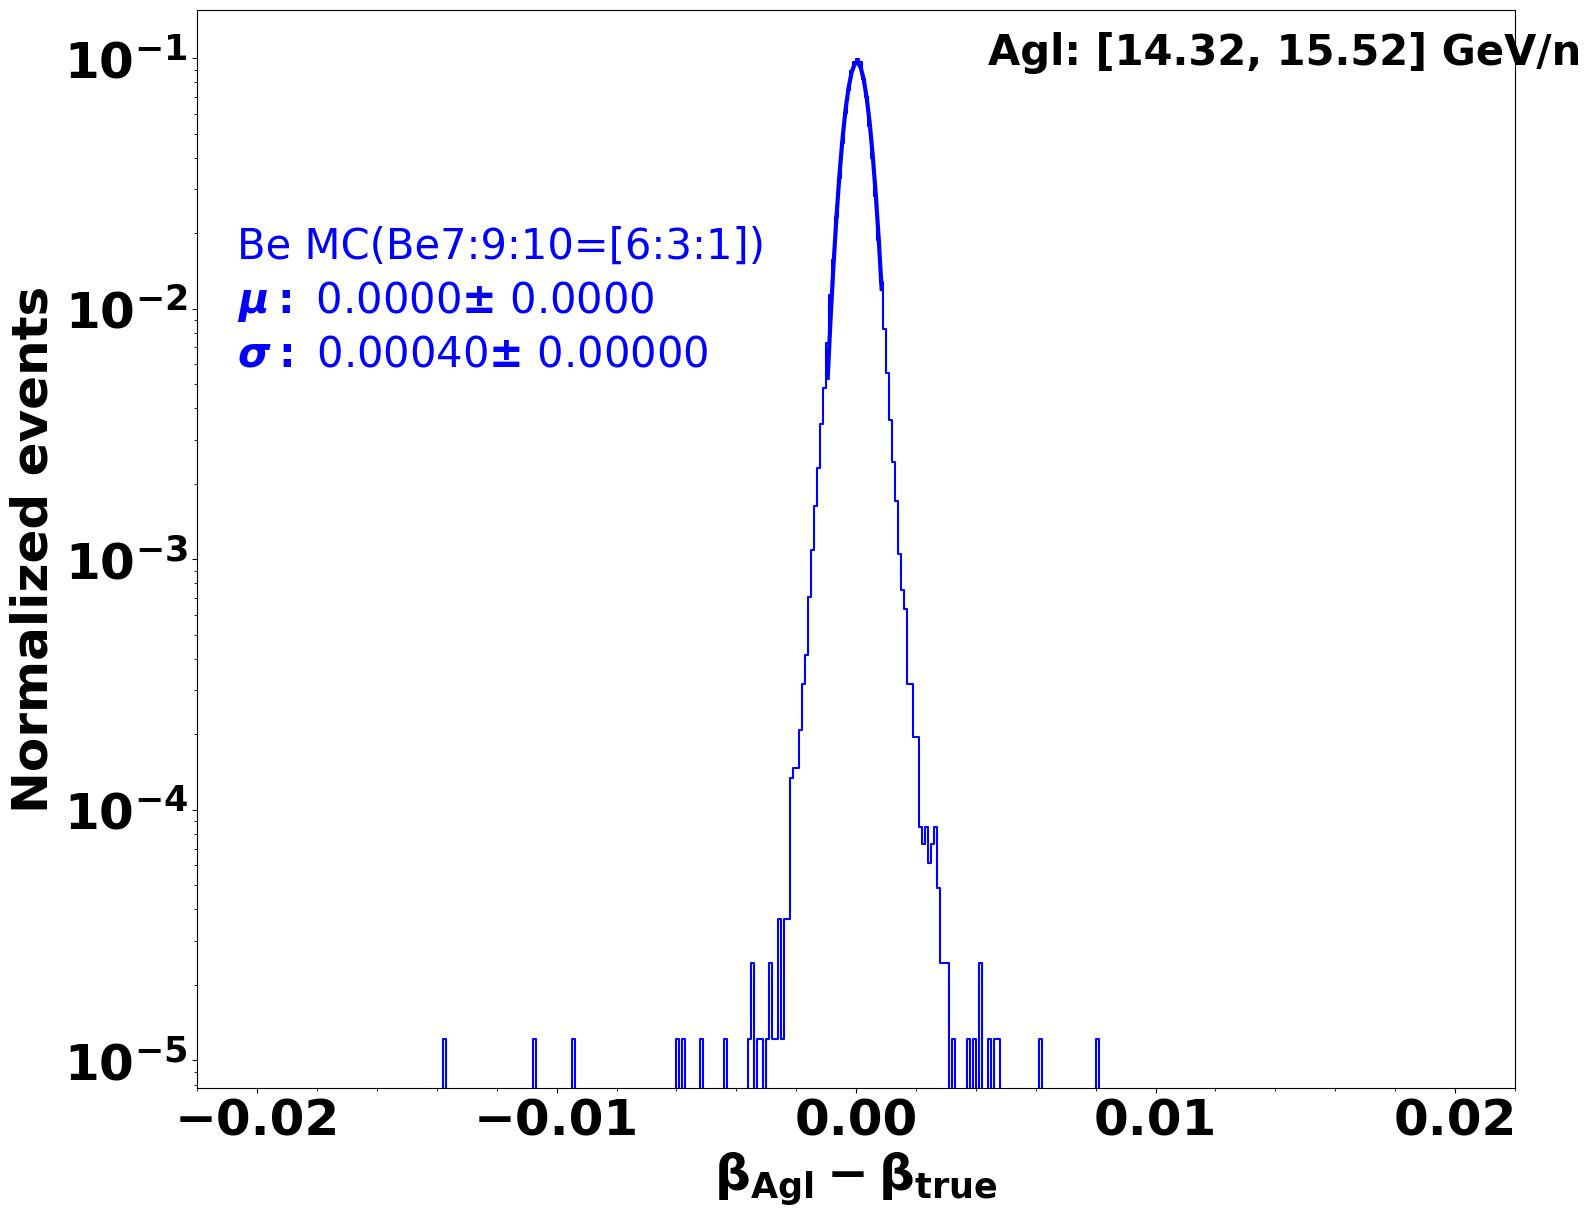

In [27]:
minbin = {'NaF': 5, 'Agl': 15}
maxbin = {'NaF': 58, 'Agl': 58}

graph_mean_iss = dict()
graph_sigma_iss = dict()

graph_mean_mc = dict()
graph_sigma_mc = dict()
xrange = {'NaF':[-0.04, 0.008], 'Agl': [-0.001, 0.001]}
for dec in decs:
    energy_binvalues = hist2d_mc[dec].binnings[0].bin_centers[minbin[dec]:maxbin[dec]]
    print(energy_binvalues)
    graph_mean_mc[dec] = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))
    graph_sigma_mc[dec] = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))

    for ip, ibin in enumerate(range(minbin[dec], maxbin[dec])):
        
        lowbinedge = hist2d_mc[dec].binnings[0].edges[ibin]
        upbinedge = hist2d_mc[dec].binnings[0].edges[ibin + 1]
        hist1d_mc = hist2d_mc[dec].project(ibin) 
        hist1d_mc = hist1d_mc * (1/np.sum(hist1d_mc.values))
    
 
        xbinrange = hist1d_mc.binnings[0].get_indices(xrange[dec])
    
        xedges_mc = hist1d_mc.binnings[0].edges[xbinrange[0]:xbinrange[1]+1]
        xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange[0]:xbinrange[1]]
        yvalue_mc = hist1d_mc.values[xbinrange[0]:xbinrange[1]]
        yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange[0]:xbinrange[1]])
        yvalueserr_mc[yvalueserr_mc==0] = 0.0001
        guess_gaus_iss = dict(norm=0.0005, mu=0.0001, sigma=0.005)
        guess_gaus_mc = {'NaF': dict(norm=0.01, mu=0.0001, sigma=0.001), 'Agl': dict(norm=0.01, mu=0.0001, sigma=0.0005)}
        #par_iss, parerr_iss = minuitfit_LL(yvalue_iss, xedges_iss , cumulative_norm_gaus, guess_gaus_iss)                                                                                                                  
        #par_mc, parerr_mc = minuitfit_LL(yvalue_mc, xedges_mc, cumulative_norm_gaus, guess_gaus_mc)  
       
        par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc[dec])
        for key in guess_gaus_mc[dec].keys():
            guess_gaus_mc[dec][key] = par_mc[key]
    
        
        xrange_iter2mc = [guess_gaus_mc[dec]['mu'] - 2.3 * guess_gaus_mc[dec]['sigma'], guess_gaus_mc[dec]['mu'] + 2.3 * guess_gaus_mc[dec]['sigma']]
        xbinrange2mc = hist1d_mc.binnings[0].get_indices(xrange_iter2mc)
    
        xedges_mc = hist1d_mc.binnings[0].edges[xbinrange2mc[0]:xbinrange2mc[1]+1]
        xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange2mc[0]:xbinrange2mc[1]]
        yvalue_mc = hist1d_mc.values[xbinrange2mc[0]:xbinrange2mc[1]]
        yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange2mc[0]:xbinrange2mc[1]])
        yvalueserr_mc[yvalueserr_mc==0] = 0.0001
    
        
        par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc[dec])
       
       
        graph_mean_mc[dec].yvalues[ip] = par_mc['mu']
        graph_mean_mc[dec].yerrs[ip] = parerr_mc['mu']
        graph_sigma_mc[dec].yvalues[ip] = par_mc['sigma']
        graph_sigma_mc[dec].yerrs[ip] = parerr_mc['sigma']
                                                                                                                                                   
        fit_y_mc = normalized_gaussian(xvalue_mc, *par_mc) 
    
        draw= False
        if ip==2 or ip == 15:
            figure, ax1 = plt.subplots(1, 1, figsize=(17, 14))
            plot_histogram_1d(ax1, hist1d_mc, style="mc", color=mccolor, label=None, scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False) 
            #ax1.legend()
            ax1.plot(xvalue_mc, fit_y_mc, '-', linewidth=3, color='blue')
            ax1.text(0.6, 0.98, f"{dec}: [{lowbinedge:.2f}, {upbinedge:.2f}] GeV/n", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold") 
            
            #ax1.set_ylim([0.0001, 0.1])
    
            ax1.text(0.03, 0.8, f'{MCNameText[nuclei]}', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.text(0.03, 0.75, f"$\\mu:$ {par_mc['mu']:.4f}$\\pm$ {parerr_mc['mu']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.text(0.03, 0.7, f"$\\sigma:$ {par_mc['sigma']:.5f}$\\pm$ {parerr_mc['sigma']:.5f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.set_ylabel('Normalized events')
            ax1.set_xlabel(rf'$\mathrm{{\beta_{{{dec}}}-\beta_{{true}}}}$')
            #ax1.set_xlim([-0.006, 0.006])
            ax1.set_yscale('log')
        
            #plt.show(False)
            savefig_tofile(figure, plotfile, f"hist1d_{figsuffix}_Compare_{ibin}_{nuclei}{dec}_100GeVn", show=True) 


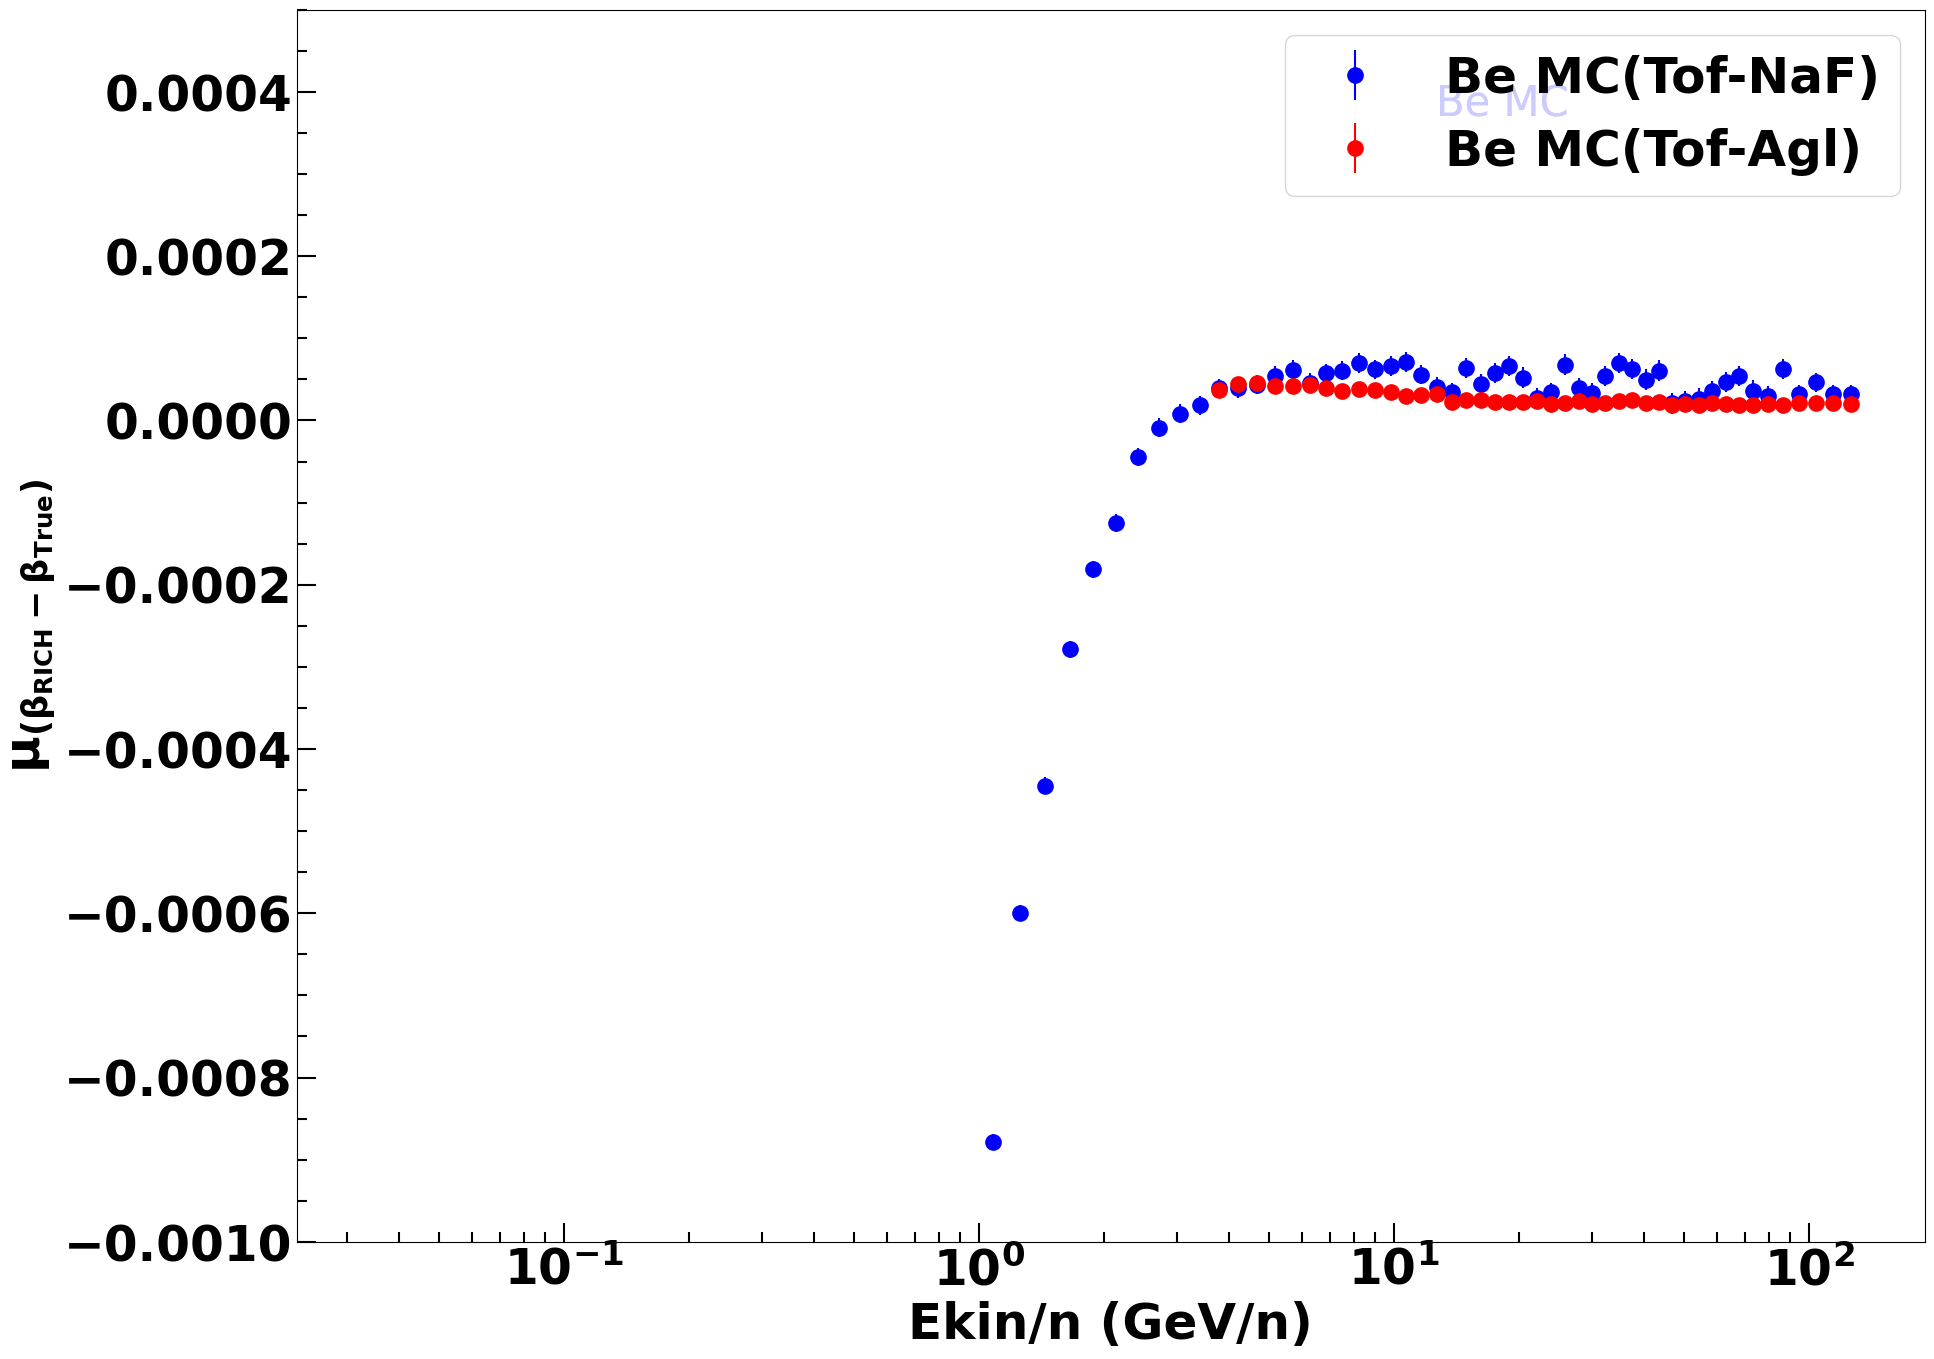

In [28]:
fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
isscol = {'NaF': 'black', 'Agl': 'tab:orange'}
mccol = {'NaF': 'blue', 'Agl': 'red'}
for dec in decs:
    plot_graph(fig, ax1, graph_mean_mc[dec], color=mccol[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{MCName} MC(Tof-{dec})')  
    ax1.set_xlabel('Ekin/n (GeV/n)')
    ax1.set_ylabel(r'$\mathrm{\mu_{(\beta_{RICH} - \beta_{True})}}$')
    ax1.legend()
    #ax1.text(0.7, 0.98, f'{nuclei} Data', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
    ax1.text(0.7, 0.94, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')
    ax1.set_ylim([-0.001, 0.0005])
    savefig_tofile(fig, plotfile, f"graph_mean_{figsuffix}_{nuclei}_finebin", show=True) 


In [29]:
from tools.graphs import scale_graph
graph_sigma_mchighR = {}
graph_sigma_isshighR = {}
graph_sigma_mchighR['Agl'] = MGraph([133], [0.00041],  [0.000002])
graph_sigma_isshighR['Agl'] = MGraph([133], [0.00045], [0.000002])

graph_sigma_mchighR['NaF'] = MGraph([130], [0.00123],  [0.000003])
graph_sigma_isshighR['NaF'] = MGraph([130], [0.00145], [0.000003])


rangedec = {'NaF': [1.1, 4.0], 'Agl':[3.5, 12.0]}
graph_sigma_highR_ratio = {}
graph_sigma_mc_tuned = {}

for dec in decs:
    graph_sigma_mc_tuned[dec] = scale_graph(graph_sigma_mc[dec], 1)
    graph_sigma_mc_tuned[dec].yvalues = graph_sigma_mc[dec].yvalues + (graph_sigma_isshighR[dec].yvalues - graph_sigma_mchighR[dec].yvalues)
    




NaF 0.0011203428279739755
NaF [0.49844169]
Agl 0.000386326253746498
Agl [0.59184366]


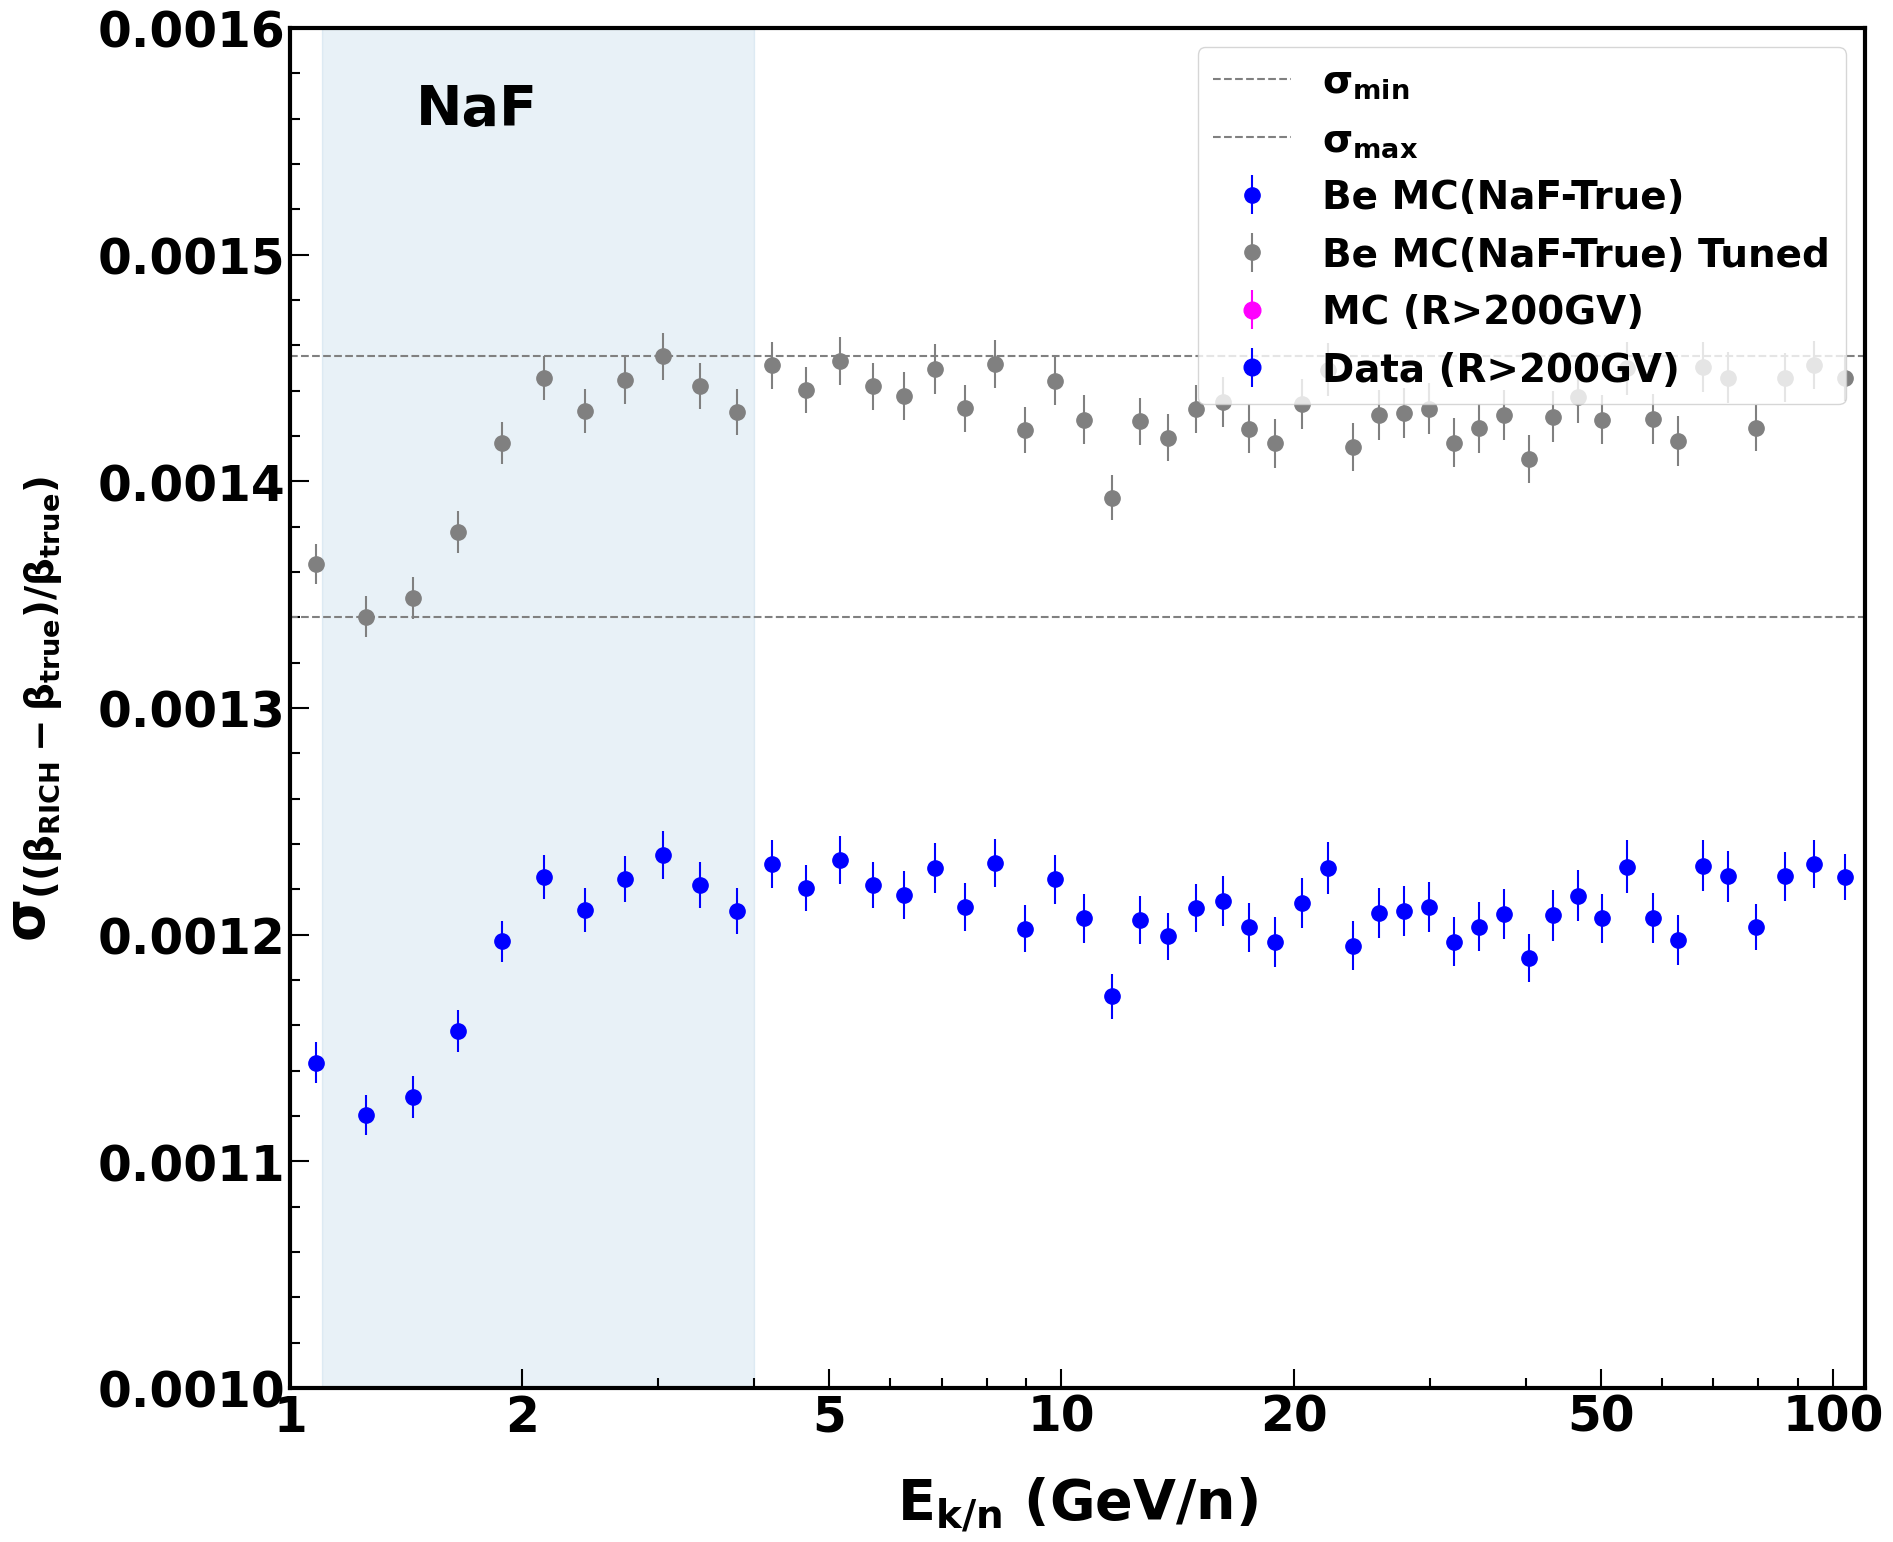

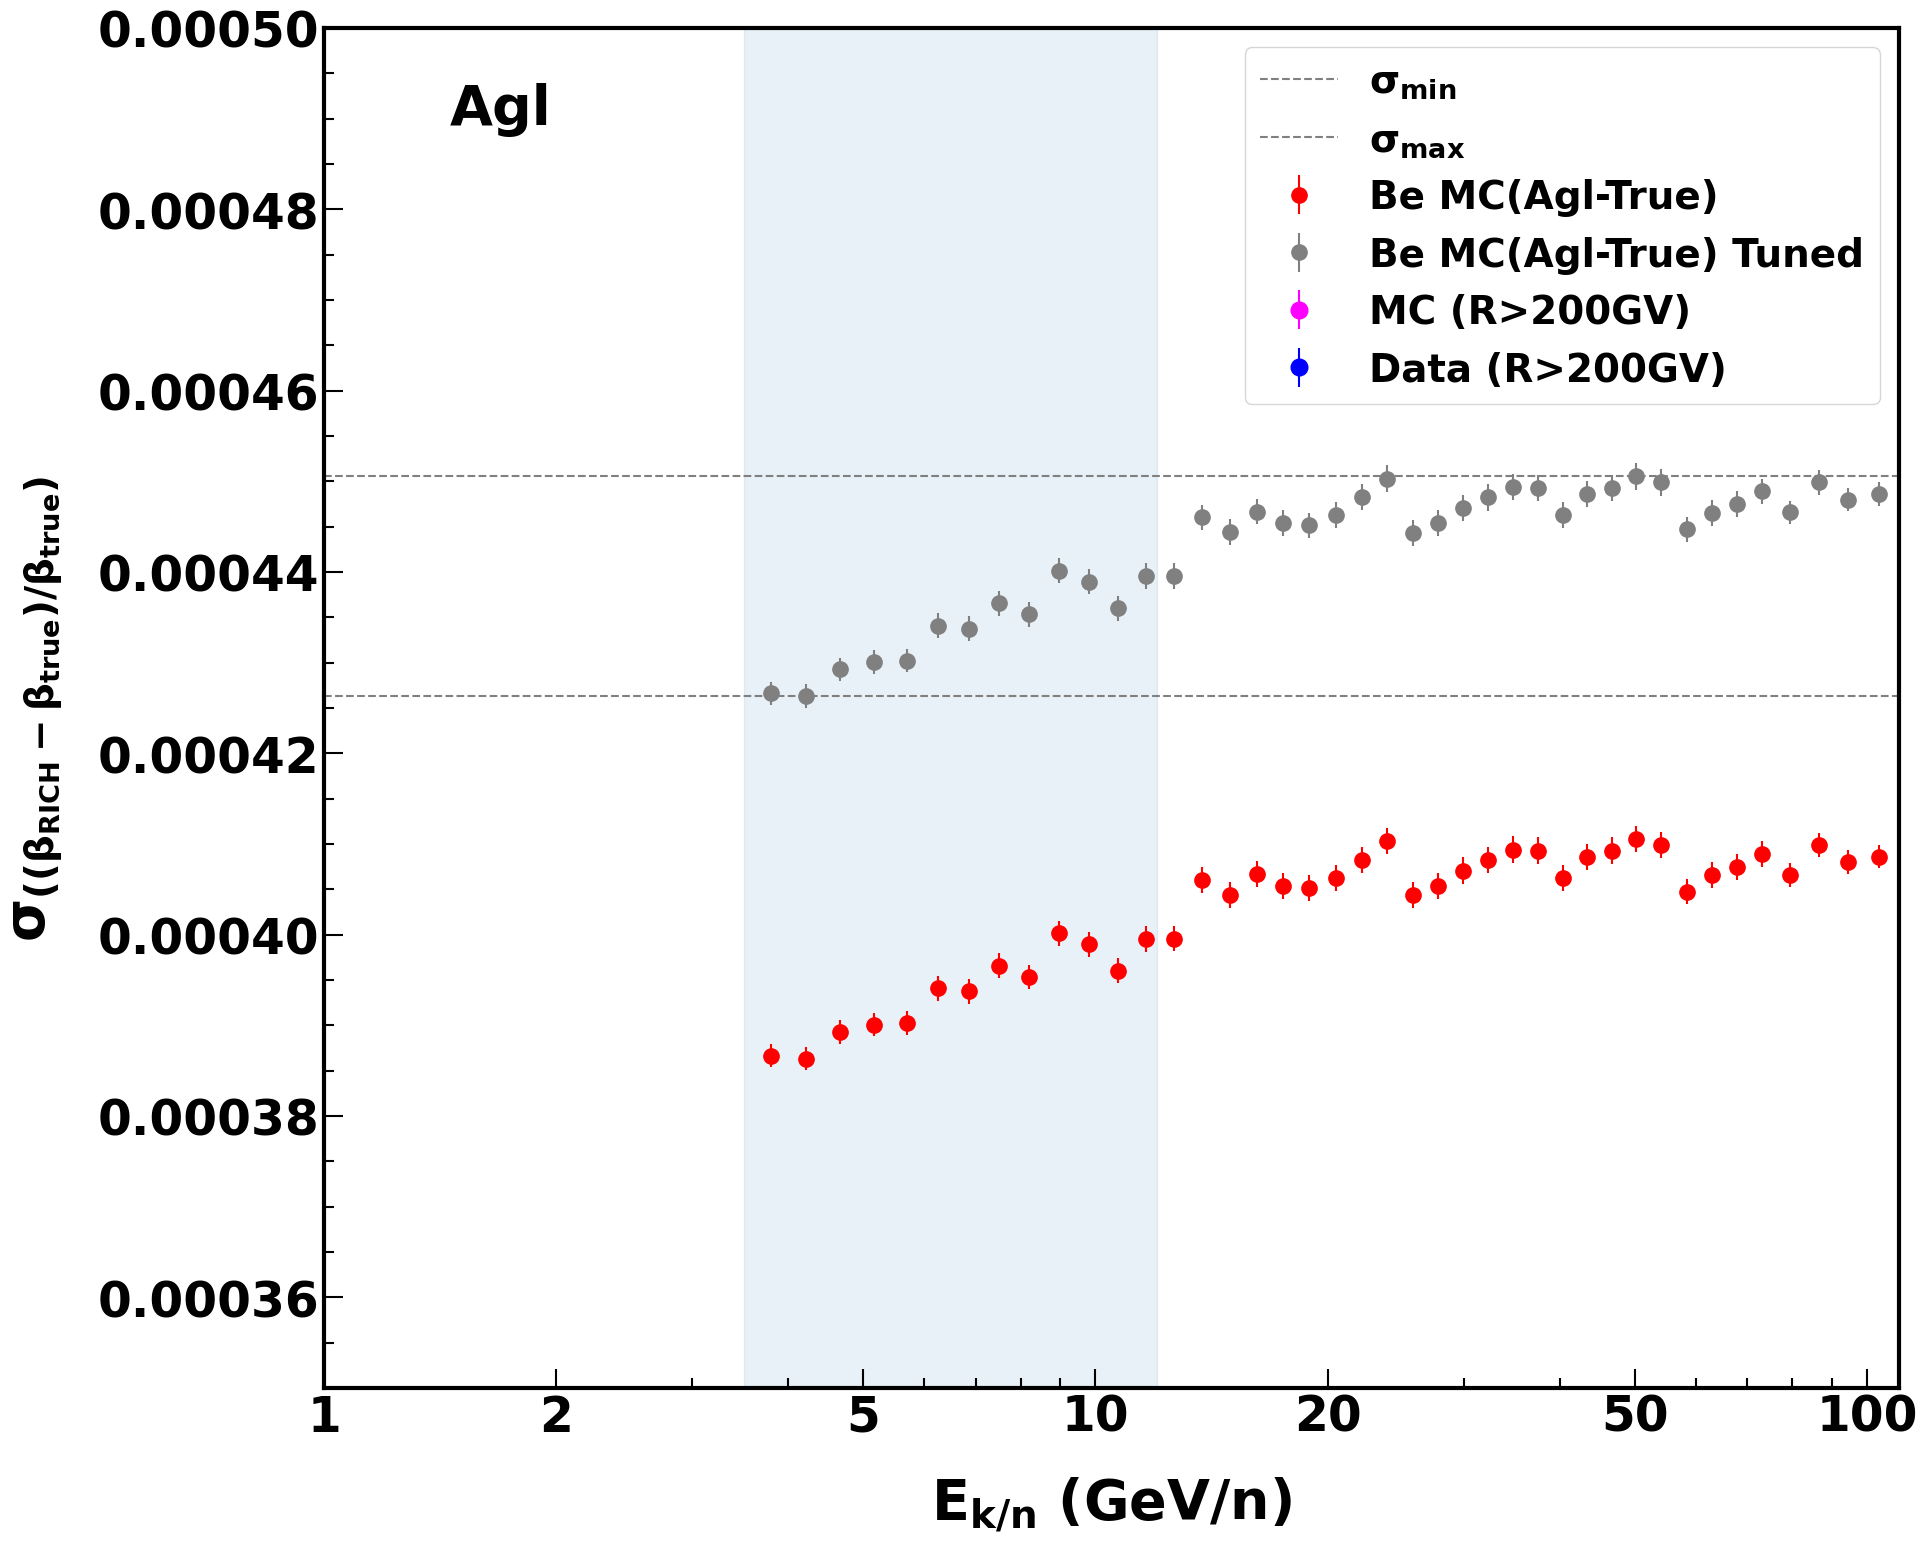

In [30]:
ylimrange = {'NaF':[0.001, 0.0016] , 'Agl':[0.00035, 0.0005]}
for dec in ['NaF', 'Agl']:
    graph_sigma_highR_ratio[dec] = graph_sigma_isshighR[dec]/graph_sigma_mchighR[dec]
    fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
    fig.subplots_adjust(left= 0.2, right=0.95, bottom=0.1, top=0.95)
    set_plot_style(ax1)
    plot_graph(fig, ax1, graph_sigma_mc[dec], color=mccol[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{MCName} MC({dec}-True)')  
    plot_graph(fig, ax1, graph_sigma_mc_tuned[dec], color='grey',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{MCName} MC({dec}-True) Tuned')  
    plot_graph(fig, ax1, graph_sigma_mchighR[dec], color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=24, label=f'MC (R>200GV)') 
    plot_graph(fig, ax1, graph_sigma_isshighR[dec], color='blue',  style="EP", xlog=False, ylog=False, scale=None, markersize=24, label=f'Data (R>200GV)') 
    
    custom_ticks = [1, 2, 5, 10 ,20, 50, 100]  # Adjust these as needed
    custom_labels = ['1', '2', '5', '10', '20', '50', '100']  # Labels for the ticks
    SetAx1Axis(ax1, r'$\mathrm{E_{k/n} \ (GeV/n)}$', r'$\mathrm{\sigma_{((\beta_{RICH} - \beta_{true})/\beta_{true})}}$', TEXTSIZE, ylimrange=ylimrange[dec],  custom_ticks = [1, 2, 5, 10 ,20, 50, 100],custom_tickslabels = custom_labels)
    ax1.set_xlim([1, 110])
    ax1.text(0.08, 0.96, f'{dec}', fontsize=TEXTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black', weight='bold')  
    ax1.fill_betweenx(np.linspace(ylimrange[dec][0], ylimrange[dec][1],  100), rangedec[dec][0], rangedec[dec][1], alpha=0.1, color="tab:blue") 
    ax1.axhline(y=min(graph_sigma_mc_tuned[dec].yvalues), color='grey', linestyle='--', label=r'$\mathrm{\sigma_{min}}$') 
    ax1.axhline(y=max(graph_sigma_mc_tuned[dec].yvalues), color='grey', linestyle='--', label=r'$\mathrm{\sigma_{max}}$')
    ax1.legend(loc='upper right',  fontsize=28)
    plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024'
    savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}_finebin_{dec}MTrue", show=True) 
    
    print(dec, min(graph_sigma_mc[dec].yvalues))
    print(dec, abs((min(graph_sigma_mc[dec].yvalues)-graph_sigma_mchighR[dec].yvalues))/abs(graph_sigma_isshighR[dec].yvalues - graph_sigma_mchighR[dec].yvalues))

/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024
graph_sigma_refRICHTuned_Be_finebin_NaFMTrue
NaF 0.0011203428279739755
NaF [0.49844169]
/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024
graph_sigma_refRICHTuned_Be_finebin_AglMTrue
Agl 0.000386326253746498
Agl [0.59184366]


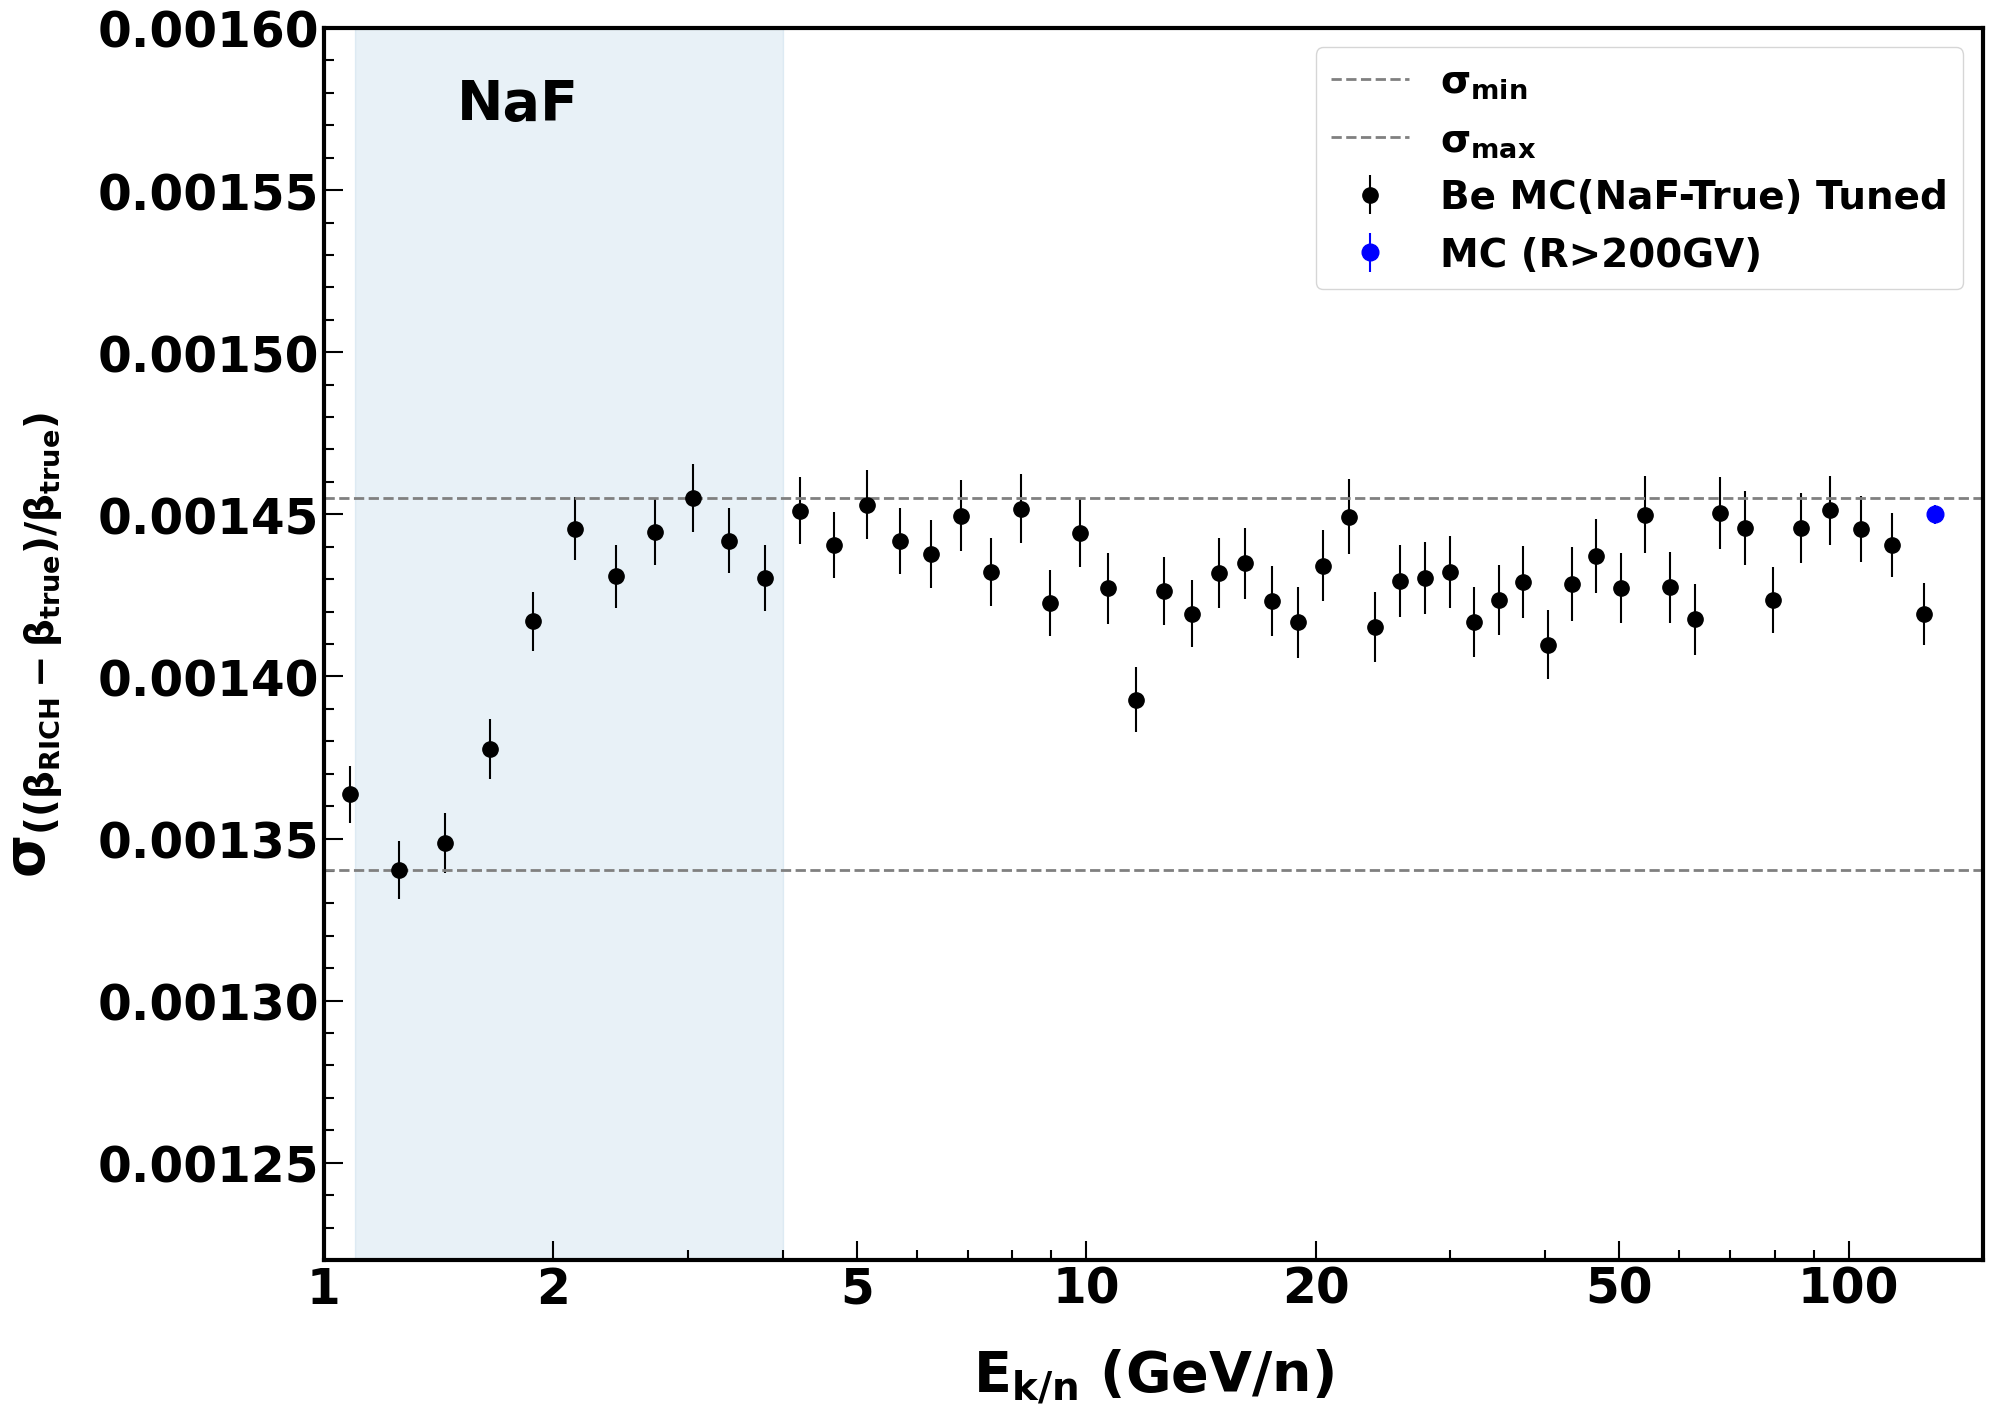

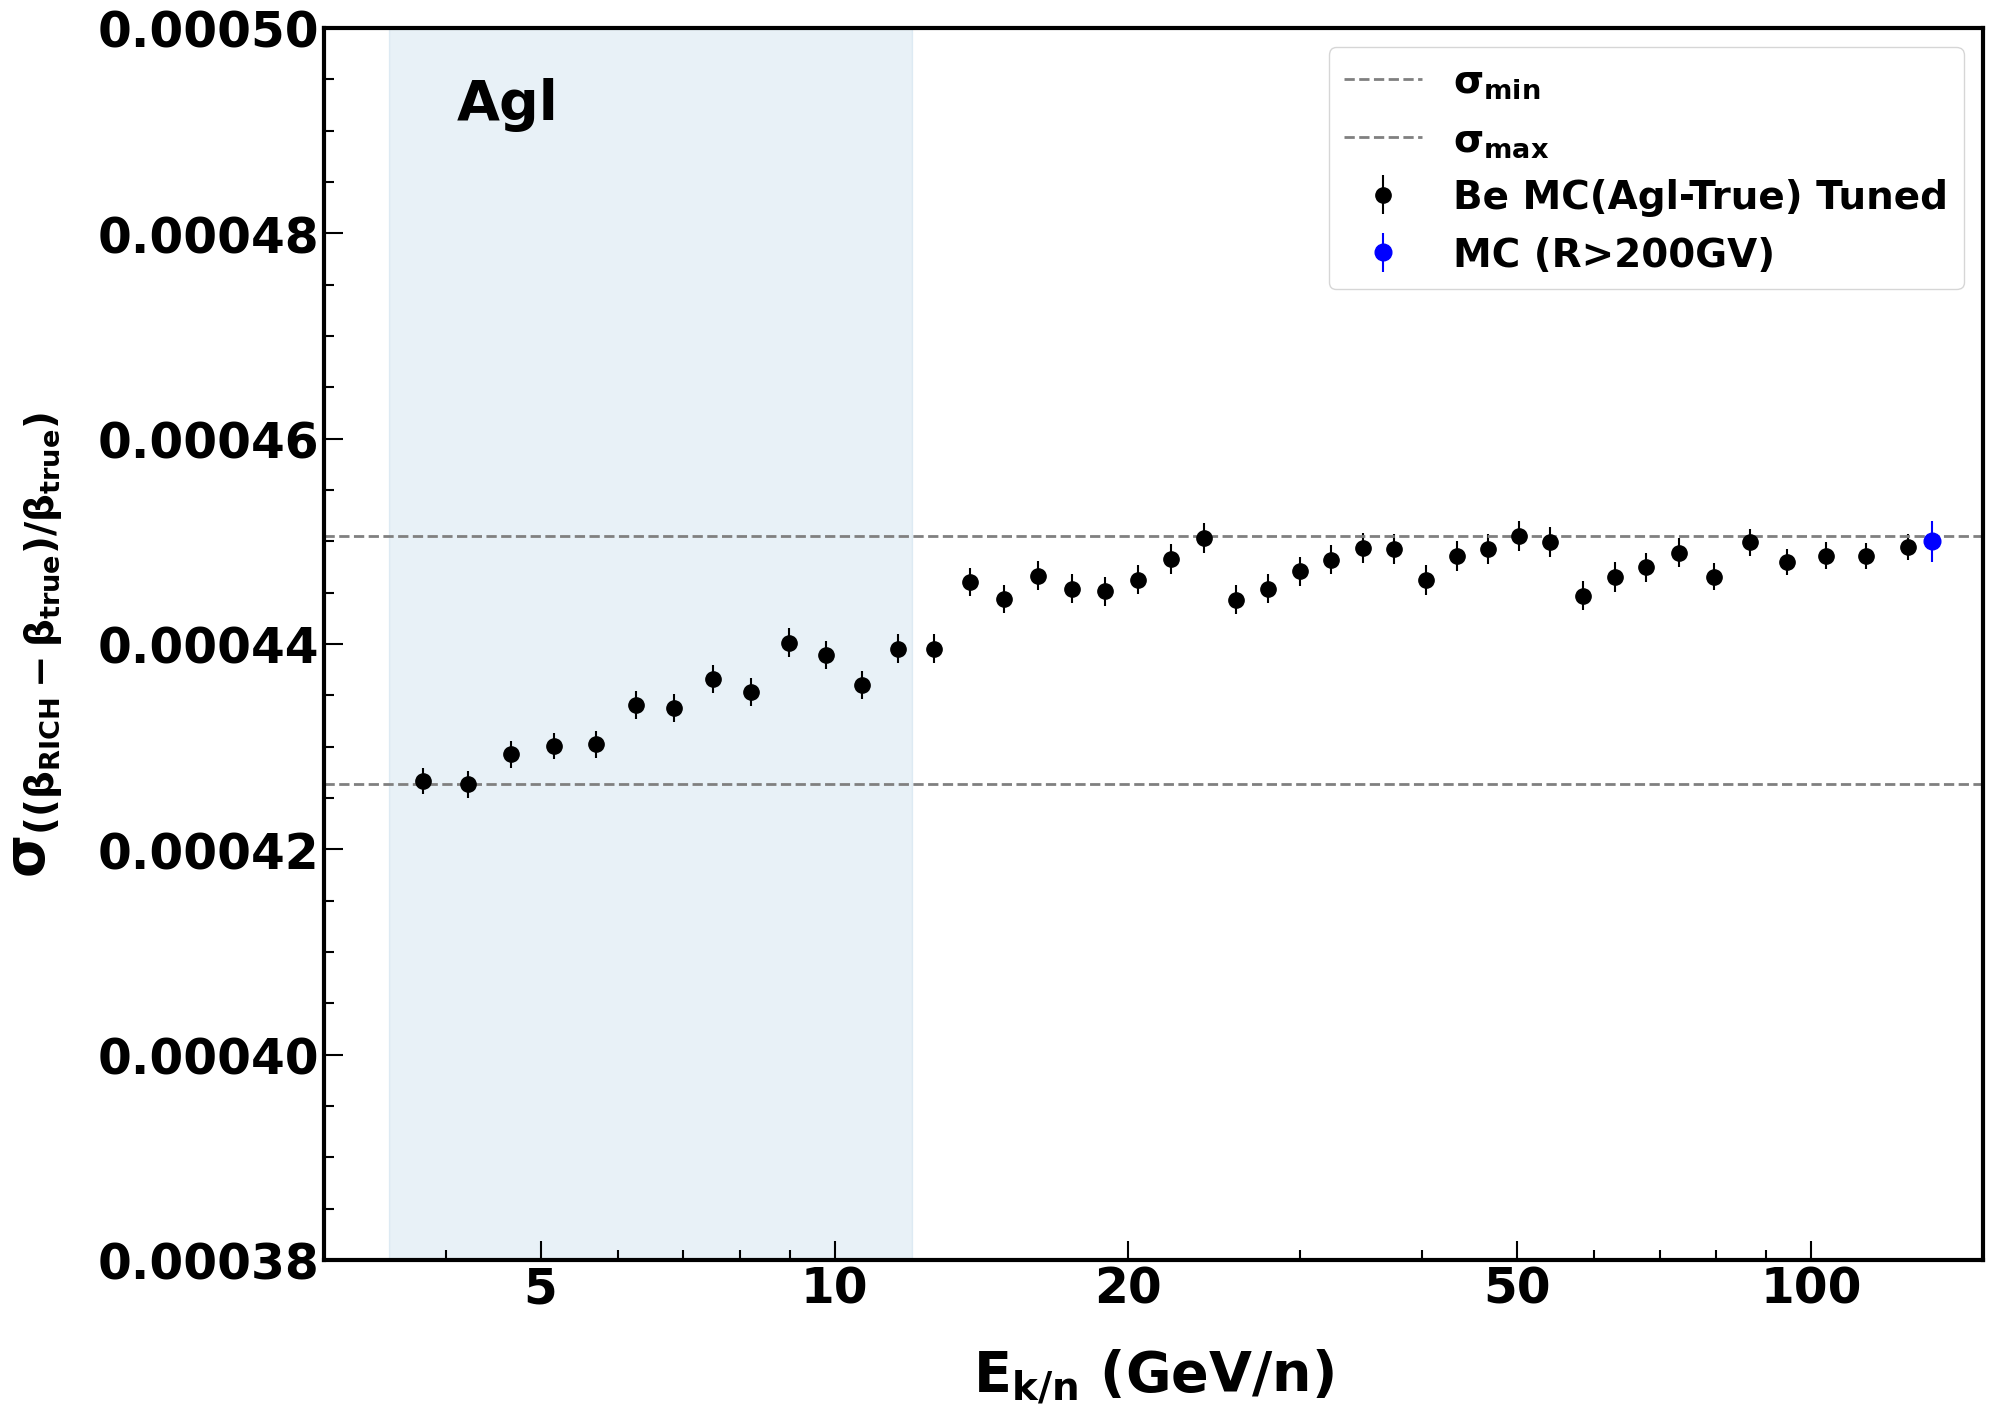

In [36]:
ylimrange = {'NaF':[0.00122, 0.0016] , 'Agl':[0.00038, 0.0005]}
xlimrange = {'NaF': [1, 150], 'Agl':[3, 150]}
for dec in ['NaF', 'Agl']:
    graph_sigma_highR_ratio[dec] = graph_sigma_isshighR[dec]/graph_sigma_mchighR[dec]
    fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
    fig.subplots_adjust(left= 0.18, right=0.97)
    set_plot_style(ax1)
    #plot_graph(fig, ax1, graph_sigma_mc[dec], color=mccol[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{MCName} MC({dec}-True)')  
    plot_graph(fig, ax1, graph_sigma_mc_tuned[dec], color='black',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{MCName} MC({dec}-True) Tuned')  
    #plot_graph(fig, ax1, graph_sigma_mchighR[dec], color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=24, label=f'MC (R>200GV)') 
    plot_graph(fig, ax1, graph_sigma_isshighR[dec], color='blue',  style="EP", xlog=False, ylog=False, scale=None, markersize=24, label=f'MC (R>200GV)') 
    
    custom_ticks = [1, 2, 5, 10 ,20, 50, 100]  # Adjust these as needed
    custom_labels = ['1', '2', '5', '10', '20', '50', '100']  # Labels for the ticks
    SetAx1Axis(ax1, r'$\mathrm{E_{k/n} \ (GeV/n)}$', r'$\mathrm{\sigma_{((\beta_{RICH} - \beta_{true})/\beta_{true})}}$', TEXTSIZE, ylimrange=ylimrange[dec],  custom_ticks = [1, 2, 5, 10 ,20, 50, 100],custom_tickslabels = custom_labels)
    ax1.set_xlim(xlimrange[dec])
    ax1.text(0.08, 0.96, f'{dec}', fontsize=TEXTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black', weight='bold')  
    ax1.fill_betweenx(np.linspace(ylimrange[dec][0], ylimrange[dec][1],  100), rangedec[dec][0], rangedec[dec][1], alpha=0.1, color="tab:blue") 
    ax1.axhline(y=min(graph_sigma_mc_tuned[dec].yvalues), color='grey', linestyle='--', label=r'$\mathrm{\sigma_{min}}$', linewidth=2) 
    ax1.axhline(y=max(graph_sigma_mc_tuned[dec].yvalues), color='grey', linestyle='--', label=r'$\mathrm{\sigma_{max}}$', linewidth=2)
    ax1.legend(loc='upper right',  fontsize=28)
    plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024'
    savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}_finebin_{dec}MTrue", show=True) 
    print(plotfile)
    print(f"graph_sigma_{figsuffix}_{nuclei}_finebin_{dec}MTrue")
    print(dec, min(graph_sigma_mc[dec].yvalues))
    print(dec, abs((min(graph_sigma_mc[dec].yvalues)-graph_sigma_mchighR[dec].yvalues))/abs(graph_sigma_isshighR[dec].yvalues - graph_sigma_mchighR[dec].yvalues))

In [ ]:
ylimrange = {'NaF':[0.001, 0.0016] , 'Agl':[0.00038, 0.0005]}
for dec in ['NaF']:
    graph_sigma_highR_ratio[dec] = graph_sigma_isshighR[dec]/graph_sigma_mchighR[dec]
    fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
    fig.subplots_adjust(left= 0.2, right=0.95, bottom=0.1, top=0.95)
    set_plot_style(ax1)
    #plot_graph(fig, ax1, graph_sigma_mc[dec], color=mccol[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{MCName} MC({dec}-True)')  
    plot_graph(fig, ax1, graph_sigma_mc_tuned[dec], color='grey',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{MCName} MC({dec}-True) Tuned')  
    #plot_graph(fig, ax1, graph_sigma_mchighR[dec], color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=24, label=f'MC (R>200GV)') 
    plot_graph(fig, ax1, graph_sigma_isshighR[dec], color='blue',  style="EP", xlog=False, ylog=False, scale=None, markersize=24, label=f'Data (R>200GV)') 
    
    custom_ticks = [1, 2, 5, 10 ,20, 50, 100]  # Adjust these as needed
    custom_labels = ['1', '2', '5', '10', '20', '50', '100']  # Labels for the ticks
    SetAx1Axis(ax1, r'$\mathrm{{Ekin/n_{true}} \ (GeV/n)}$', r'$\mathrm{\sigma_{((\beta_{RICH} - \beta_{true})/\beta_{true})}}$', TEXTSIZE, ylimrange=ylimrange[dec],  custom_ticks = [1, 2, 5, 10 ,20, 50, 100],custom_tickslabels = custom_labels)
  
    ax1.text(0.08, 0.96, f'{dec}', fontsize=TEXTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black', weight='bold')  
    ax1.fill_betweenx(np.linspace(ylimrange[dec][0], ylimrange[dec][1],  100), rangedec[dec][0], rangedec[dec][1], alpha=0.1, color="tab:blue") 
    ax1.axhline(y=min(graph_sigma_mc_tuned[dec].yvalues), color='grey', linestyle='--', label=r'$\mathrm{\sigma_{min}}$') 
    ax1.axhline(y=max(graph_sigma_mc_tuned[dec].yvalues), color='grey', linestyle='--', label=r'$\mathrm{\sigma_{max}}$')
    ax1.legend(loc='upper right',  fontsize=28)
    plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024'
    savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}_finebin_{dec}MTrue", show=True) 
    
    print(dec, min(graph_sigma_mc[dec].yvalues))
    print(dec, abs((min(graph_sigma_mc[dec].yvalues)-graph_sigma_mchighR[dec].yvalues))/abs(graph_sigma_isshighR[dec].yvalues - graph_sigma_mchighR[dec].yvalues))

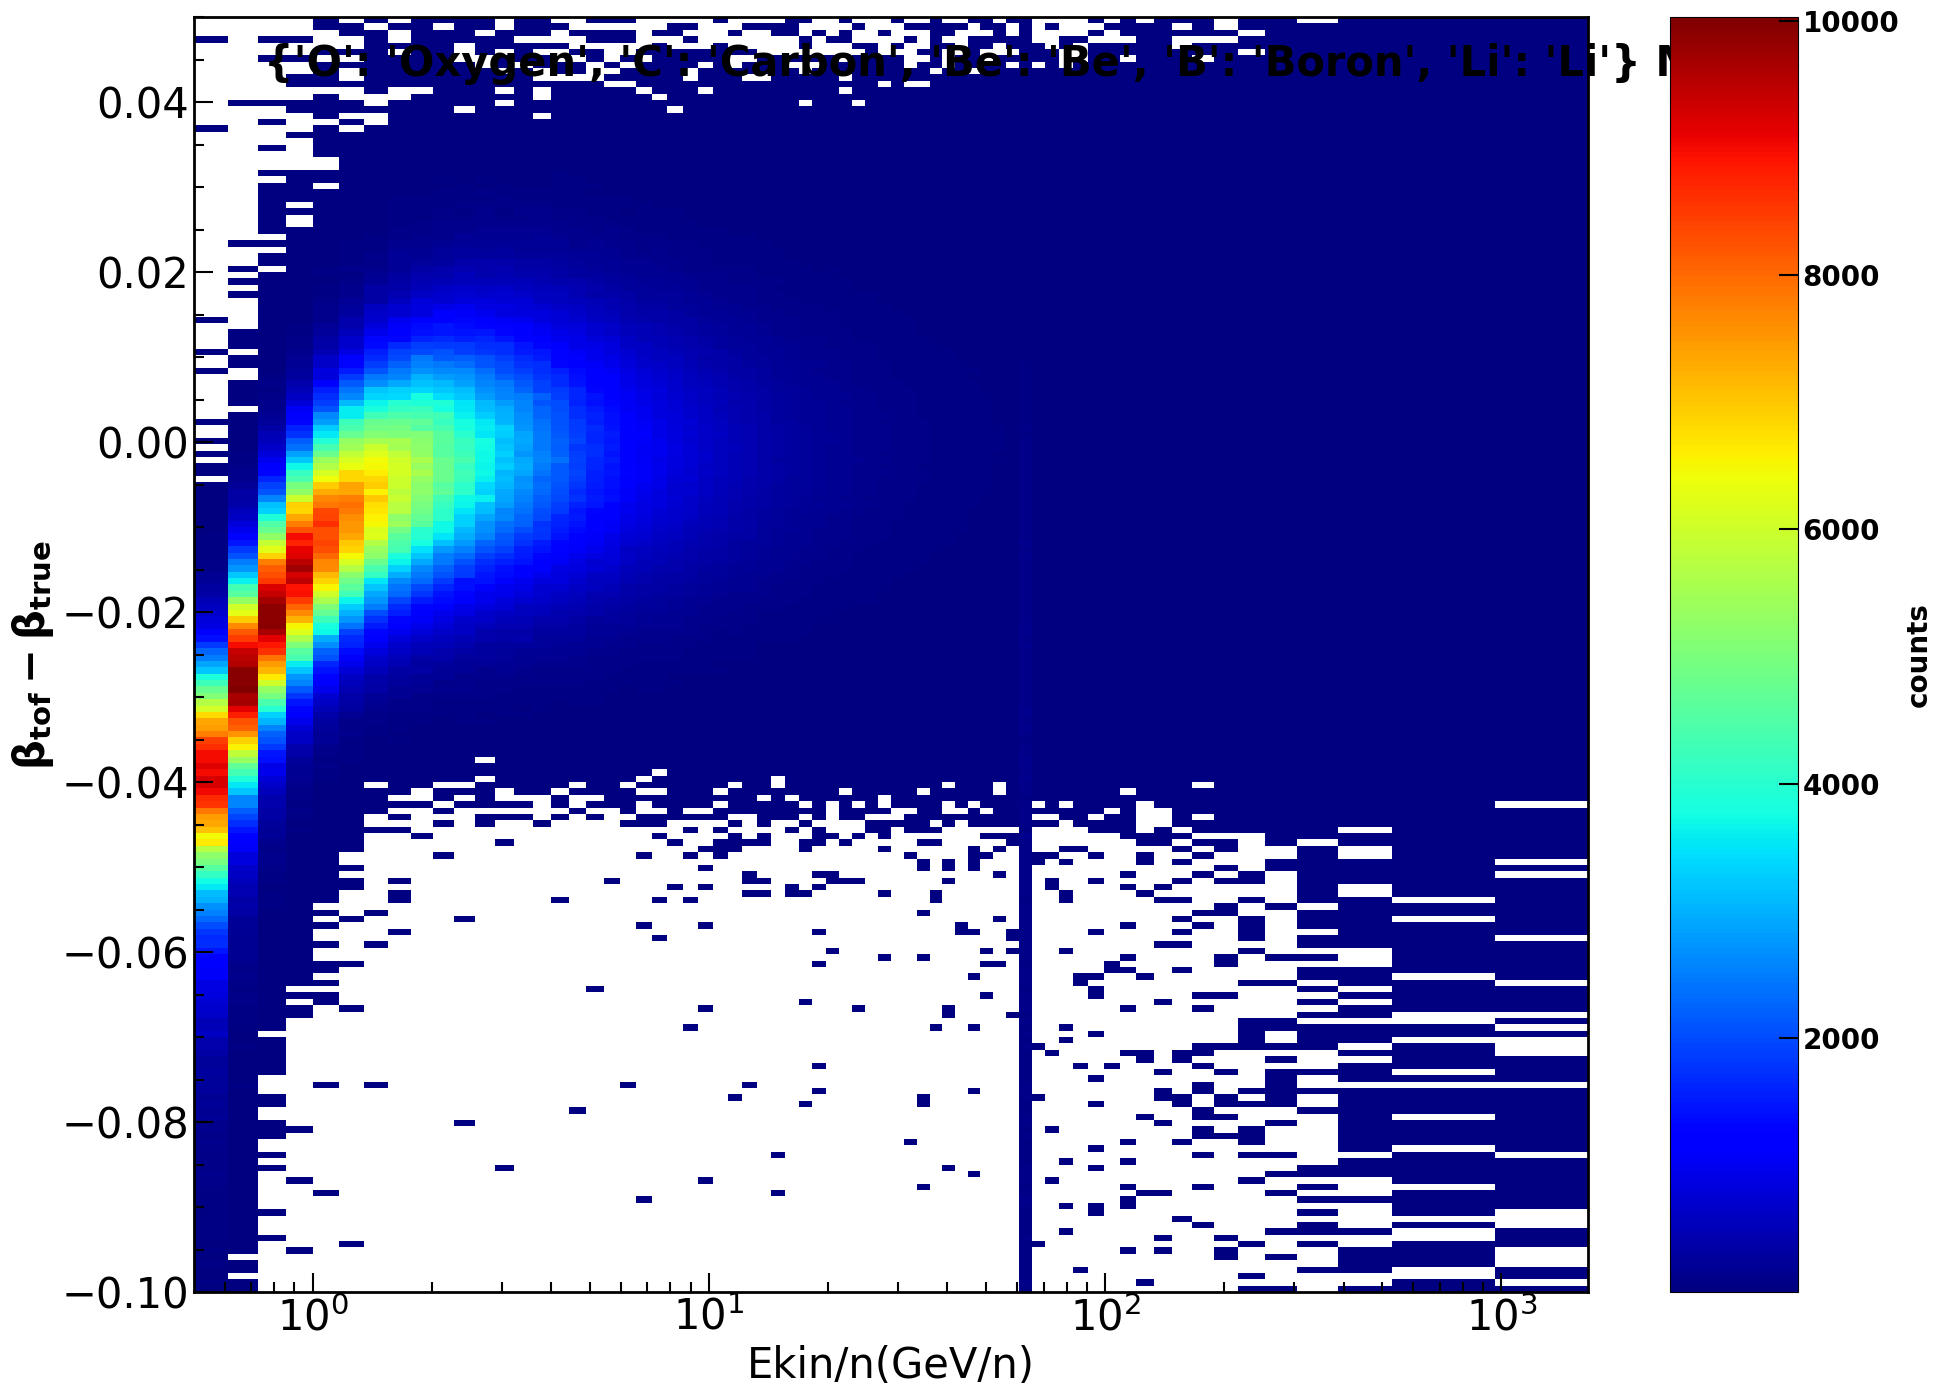

In [4]:
#file_tofbeta = '/home/manbing/Documents/Data/data_BeP8/O_tofbeta1_refTrueBeta_B1236P8_mcweight.npz'
#file_tofbeta = '/home/manbing/Documents/Data/data_BeP8/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_Reso.npz'
file_tofbeta = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_finebin.npz'
#file_tofbeta = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_NaF_finebin.npz'
datatype = {'iss', 'mc'}
refGeo = 'A0'

with np.load(f'{file_tofbeta}') as npzfile:
    hist2d_mc_tofTrue = WeightedHistogram.from_file(npzfile, f"hist_mcbetareso_mix_Tof")  
    
    fig = plt.figure(figsize=(20, 15))
    plot = fig.subplots(1, 1) 
    plot2dhist(fig, plot, xbinning=hist2d_mc_tofTrue.binnings[0].edges[1:-1], 
               ybinning=hist2d_mc_tofTrue.binnings[1].edges[1:-1], 
               counts=hist2d_mc_tofTrue.values[1:-1, 1:-1], 
               xlabel=None, ylabel=None, zlabel="counts", zmin=None, zmax=None, 
               setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False,  setlogz=False)  
    plot.text(0.05, 0.98, f"{nucleiname} MC", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=plot.transAxes, color="black", fontweight="bold")          
    plot.set_xlabel(r"Ekin/n(GeV/n)", fontsize=30)                                                                                                                                                     
    plot.set_ylabel(r'$\mathrm{\beta_{tof} - \beta_{true}}$', fontsize=30)
    plot.set_xscale('log')
    #plot.set_xlim(gammalim[dec])
    #savefig_tofile(fig, plotfile, f"hist2d_O16MC_betaResidual_{refGeo}Geo", show=True) 
 
  
                   

In [5]:
minbin = 1
maxbin = 65
energy_binvalues = hist2d_mc.binnings[0].bin_centers[minbin:maxbin]
graph_mean_mcTofTrueReso = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))
graph_sigma_mcTofTrueReso = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))

for ip, ibin in enumerate(range(minbin, maxbin)):
   
    lowbinedge = hist2d_mc_tofTrue.binnings[0].edges[ibin]
    upbinedge = hist2d_mc_tofTrue.binnings[0].edges[ibin + 1]
    hist1d_mc = hist2d_mc_tofTrue.project(ibin) 
    hist1d_mc = hist1d_mc * (1/np.sum(hist1d_mc.values))
    
    xrange = [-0.06, 0.03]
    xbinrange = hist1d_mc.binnings[0].get_indices(xrange)
    
    xedges_mc = hist1d_mc.binnings[0].edges[xbinrange[0]:xbinrange[1]+1]
    xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange[0]:xbinrange[1]]
    yvalue_mc = hist1d_mc.values[xbinrange[0]:xbinrange[1]]
    yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange[0]:xbinrange[1]])
    yvalueserr_mc[yvalueserr_mc==0] = 0.0001
   
    guess_gaus_mc = dict(norm=0.0005, mu=0.001, sigma=0.007)

    par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)
    for key in guess_gaus_mc.keys():
        guess_gaus_mc[key] = par_mc[key]
    
    xrange_iter2mc = [guess_gaus_mc['mu'] - 2.0 * guess_gaus_mc['sigma'], guess_gaus_mc['mu'] + 2.0 * guess_gaus_mc['sigma']]
    xbinrange2mc = hist1d_mc.binnings[0].get_indices(xrange_iter2mc)
    
    xedges_mc = hist1d_mc.binnings[0].edges[xbinrange2mc[0]:xbinrange2mc[1]+1]
    xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange2mc[0]:xbinrange2mc[1]]
    yvalue_mc = hist1d_mc.values[xbinrange2mc[0]:xbinrange2mc[1]]
    yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange2mc[0]:xbinrange2mc[1]])
    yvalueserr_mc[yvalueserr_mc==0] = 0.0001
    
    par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)

    graph_mean_mcTofTrueReso.yvalues[ip] = par_mc['mu']
    graph_mean_mcTofTrueReso.yerrs[ip] = parerr_mc['mu']
    graph_sigma_mcTofTrueReso.yvalues[ip] = par_mc['sigma']
    graph_sigma_mcTofTrueReso.yerrs[ip] = parerr_mc['sigma']
                                                                                                                                                            
    fit_y_mc = normalized_gaussian(xvalue_mc, *par_mc) 
    draw = False
    plotp = [0, 1, 2, 3, 60, 61]
    if ip in plotp:
        figure, ax1 = plt.subplots(1, 1, figsize=(17, 14))
        plot_histogram_1d(ax1, hist1d_mc, style="mc", color=mccolor, label=None, scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False) 
        #ax1.legend()
        ax1.plot(xvalue_mc, fit_y_mc, '-', linewidth=3, color='blue')
        ax1.text(0.6, 0.98, f"[{lowbinedge:.2f}, {upbinedge:.2f}] GeV/n", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold") 
   
        ax1.set_ylim([0.0001, 0.1])
    
        ax1.text(0.03, 0.8, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
        ax1.text(0.03, 0.75, f"$\\mu:$ {par_mc['mu']:.4f}$\\pm$ {parerr_mc['mu']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
        ax1.text(0.03, 0.7, f"$\\sigma:$ {par_mc['sigma']:.4f}$\\pm$ {parerr_mc['sigma']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
        ax1.set_ylabel('Normalized events')
        ax1.set_xlabel(r'$\mathrm{\beta_{tof}-\beta_{naf}}$')
        ax1.set_xlim([-0.07, 0.06])
        ax1.set_yscale('log')
        #savefig_tofile(figure, plotfile, f"hist1d_{figsuffix}_Compare_{ibin}_{nuclei}_A0", show=True) 
    


AttributeError: 'dict' object has no attribute 'binnings'

In [ ]:

graph_sigma_mchighR = MGraph([200], [0.0114],  [0.0001])
graph_sigma_isshighR = MGraph([200], [0.0096], [0.0001])
graph_sigma_highR_ratio = graph_sigma_isshighR/graph_sigma_mchighR
graph_sigma_datamcratio = {}

print(graph_sigma_mc)
fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
for dec in decs:
    plot_graph(fig, ax1, graph_sigma_iss[dec], color=isscol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{nuclei} Data (Tof-{dec})') 
for dec in decs:
    graph_sigma_datamcratio[dec] = graph_sigma_iss[dec]/graph_sigma_mc[dec]
    plot_graph(fig, ax1, graph_sigma_mc[dec], color=mccol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{MCName} MC (Tof-{dec})')  

    
plot_graph(fig, ax1, graph_sigma_mcTofTrueReso, color='tab:green',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{MCName} MC (Tof-True)') 
graph_sigma_datamcratio_highR = graph_sigma_isshighR/graph_sigma_mchighR
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)') 
ax1.set_xlabel('Ekin/n (GeV/n)')

ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{ref})}}$')


#ax1.text(0.7, 0.98, f'{nuclei} Data', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
#ax1.text(0.7, 0.94, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
ax1.set_ylim([0.002, 0.014])
ax1.set_xscale('log')
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks

ax1.set_xticks(custom_ticks)
ax1.set_xticklabels(custom_labels)
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.5, 1.1, alpha=0.08, color="tab:blue")
ax1.axvline(x=0.8, color='black', linestyle='--')
ax1.legend(loc='lower right', fontsize=22)
#ax2.axhline(y=0.8, color='black', linestyle='--')
#savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}all_TrueAtRICH_{refGeo}Geo_finebin", show=True) 







[0.85201137 0.79911776 0.75806259 0.72626317 0.7023397  0.68494107
 0.67273833 0.66486498 0.66049276 0.6590088  0.6599128  0.66273261
 0.66708675 0.67267119 0.67918503 0.68640889 0.69415666 0.70222073
 0.7105927  0.71884677 0.72687573 0.7349328  0.74286134 0.75052511
 0.75780964 0.76462183 0.77088838 0.77670189 0.78194481 0.78642645
 0.7902179  0.79326216 0.79551931 0.79698278 0.79759244 0.7973072
 0.79610225 0.79393025 0.79075996]
[0.68538806 0.6924267  0.69917045 0.70566155 0.71192872 0.71795042
 0.7237525  0.72935301 0.73473531 0.73999598 0.7449589  0.74964427
 0.75426135 0.75877141 0.76314658 0.76736774 0.77142271 0.7753046
 0.77911097 0.78281158 0.78630407 0.78967079 0.79289973 0.79598345
 0.79897043 0.80184318 0.80458956 0.80720172 0.8097086  0.81209749
 0.81435995 0.81651424 0.81857047 0.82051446 0.82233652 0.82404438
 0.82564132 0.8271274  0.82853499 0.82980018 0.83092159 0.83194891
 0.83289246 0.83370349 0.83434631]


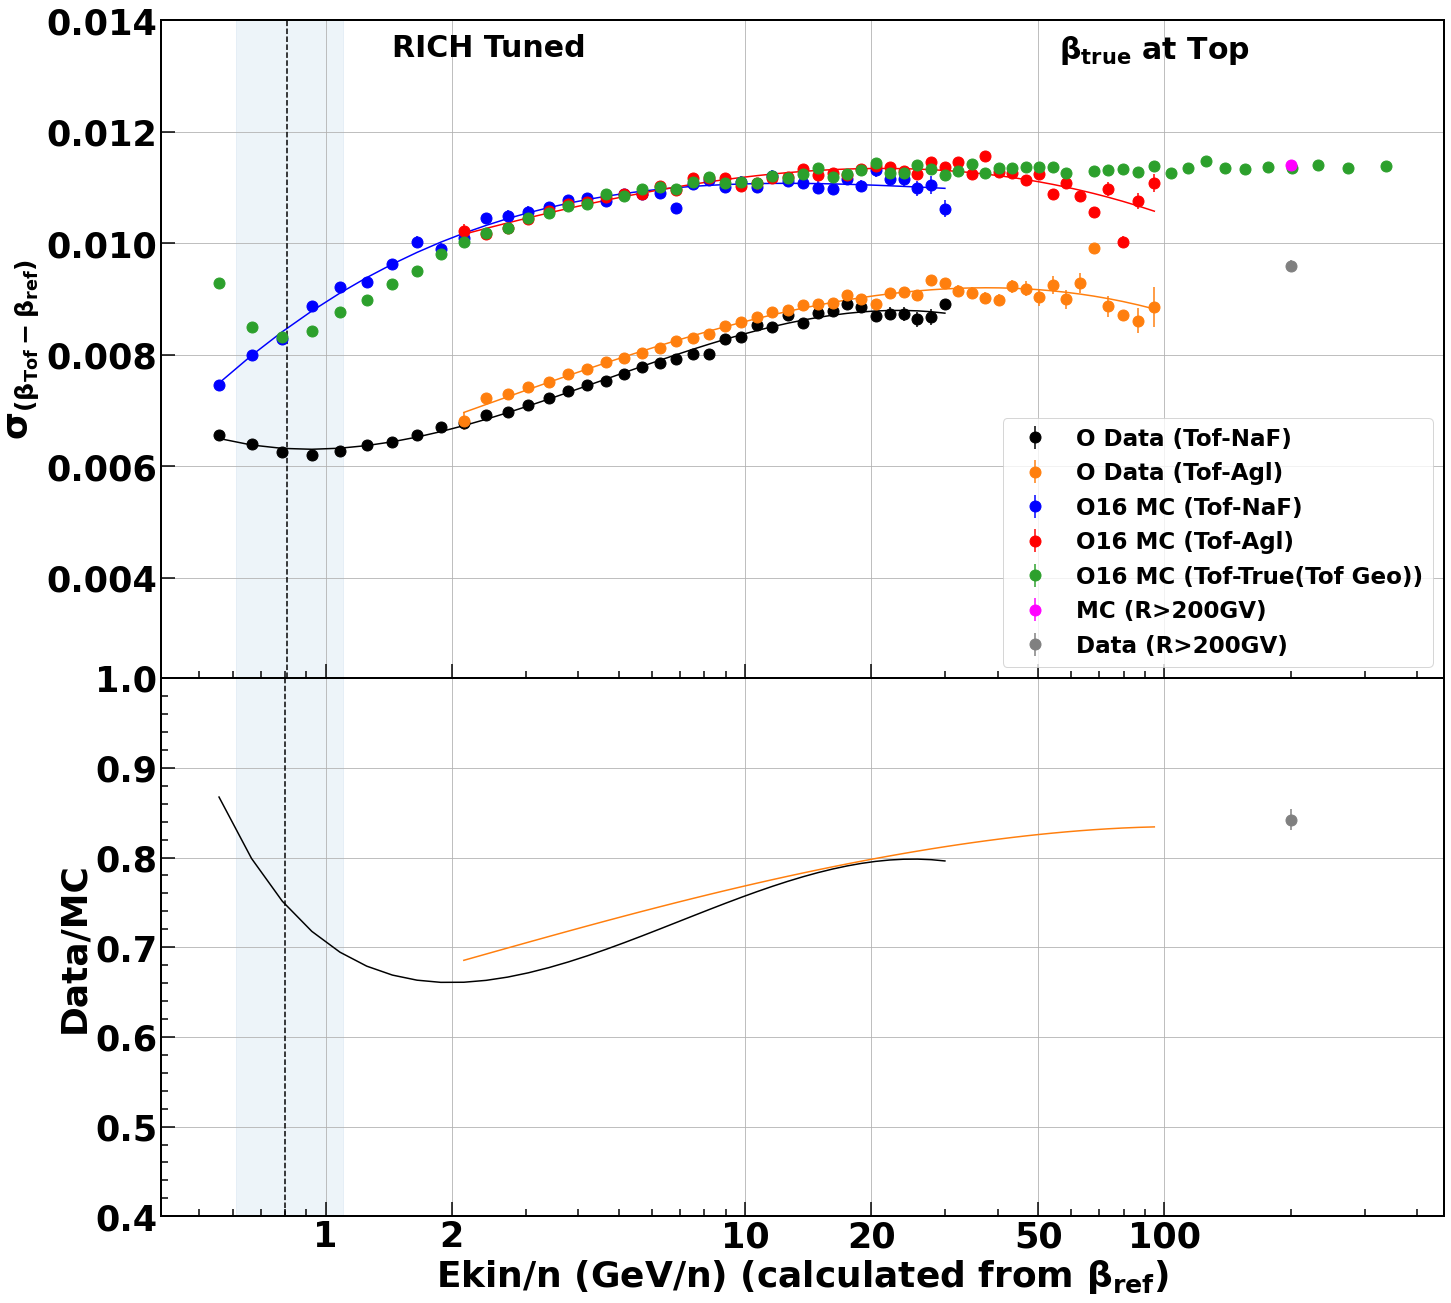

In [106]:
from tools.utilities import save_spline_to_file
from scipy.interpolate import interp1d, UnivariateSpline

def set_plotstyle(ax1, ax2):
    plt.subplots_adjust(hspace=.0)   
    set_plot_defaultstyle(ax1)
    set_plot_defaultstyle(ax2)
    ax1.set_xticklabels([])
    
def getpolyfit(agraph, p0):
    popt, pcov = curve_fit(poly, np.log(agraph.xvalues), agraph.yvalues, p0 = p0)
    polypars = uncertainties.correlated_values(popt, np.array(pcov)) 
    yfit, yfiterr = get_fitpdf_witherr(np.log(agraph.xvalues), polypars, upoly)
    graph_fit = MGraph(agraph.xvalues, yfit, yfiterr)
    return graph_fit, polypars
       
graphfit_sigma_iss = {}
polypars_iss = {}
graphfit_sigma_mc = {}
polyfitrange = {'NaF': [0.6, 30], 'Agl':[2, 100]}
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.55, 0.45]}, figsize=(23, 22)) 
set_plotstyle(ax1, ax2)
for dec in decs:
    slicegraph_iss = slice_graph_by_value(graph_sigma_iss[dec], polyfitrange[dec])
    plot_graph(fig, ax1, slicegraph_iss, color=isscol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{nuclei} Data (Tof-{dec})')
    graphfit_sigma_iss[dec], polypars_iss[dec] = getpolyfit(slicegraph_iss, p0=[1.0, 0.1, 0.1, 0.1])
    plot_graph(fig, ax1, graphfit_sigma_iss[dec], color=isscol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22)
for dec in decs:
    slicegraph_mc = slice_graph_by_value(graph_sigma_mc[dec], polyfitrange[dec])
    plot_graph(fig, ax1, slicegraph_mc, color=mccol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{MCName} MC (Tof-{dec})')  
    graphfit_sigma_mc[dec], polypars_mc[dec] = getpolyfit(slicegraph_mc, p0=[1.0, 0.1, 0.1, 0.1])
    plot_graph(fig, ax1, graphfit_sigma_mc[dec], color=mccol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22)
    
plot_graph(fig, ax1, graph_sigma_mcTofTrueReso, color='tab:green',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{MCName} MC (Tof-True(Tof Geo))') 
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)') 

ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{ref})}}$')

graphfit_sigma_datamcratio = {}
graphfit_sigma_datamcratio_lowlimit = {}
graphfit_sigma_datamcratio_uplimit = {}
spline_tofbeta_sigmacorrecton = {} 
for dec in decs:
    graphfit_sigma_datamcratio = graphfit_sigma_iss[dec]/graphfit_sigma_mc[dec]
    #slicegraph_ratio = slice_graph_by_value(graph_sigma_datamcratio[dec], [0.83, 500])
    
    plot_graph(fig, ax2, graphfit_sigma_datamcratio, color=isscol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data/MC({refGeo}-{dec})') 
    spline_tofbeta_sigmacorrecton[dec] = UnivariateSpline(np.log(graphfit_sigma_datamcratio.xvalues), graphfit_sigma_datamcratio.yvalues, k=3, s=5) 
    save_spline_to_file(spline_tofbeta_sigmacorrecton[dec], datadir, "spline_tofbeta_sigmakorr.pickle")
    
    print(spline_tofbeta_sigmacorrecton[dec](np.log(graphfit_sigma_datamcratio.xvalues)))
    

plot_graph(fig, ax2, graph_sigma_highR_ratio, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data/MC(R>200GV)') 
#ax2.plot(graphfit_sigma_iss['NaF'].xvalues,spline_tofbeta_sigmacorrecton['Agl'](np.log(graphfit_sigma_iss['NaF'].xvalues)), '--', color='tab:orange')
    
    
#np.savez(os.path.join(datadir,'spline_tofbeta_sigmakorr.npz'), sigmakorr_NaF=spline_tofbeta_sigmacorrecton['NaF'], sigmakorr_Agl=spline_tofbeta_sigmacorrecton['Agl'])

#plot_graph(fig, ax2, graph_sigma_datamcratio_highR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data/MC (R>200GV)')
#ax1.text(0.7, 0.98, f'{nuclei} Data', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
#ax1.text(0.7, 0.94, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
ax1.set_ylim([0.0022, 0.014])
ax1.set_xscale('log')
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
#ax1.set_xticks(custom_ticks)
#ax1.set_xticklabels(custom_labels)

ax2.set_ylim([0.4, 1.0])
ax2.set_xscale('log')
ax2.set_xticks(custom_ticks)
ax2.set_xticklabels(custom_labels)

ax1.axvline(x=0.81, color='black', linestyle='--')
ax2.axvline(x=0.8, color='black', linestyle='--')
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.1, alpha=0.08, color="tab:blue")
ax2.fill_betweenx(np.linspace(0.4, 1.0, 100), 0.61, 1.1, alpha=0.08, color="tab:blue")
ax1.legend(loc='lower right', fontsize=23)
#ax2.set_xlabel('Ekin/n (GeV/n)')
ax2.set_ylabel('Data/MC')
ax1.sharex(ax2)
ax2.set_xlabel(r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{ref}}$)')
ax1.grid()
ax2.grid()
ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ Top}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.18, 0.98, f"RICH {figtext}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
#savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}all_RICHNotTunedV5_TrueAtRICH_{refGeo}Geo_finebin", show=True) 


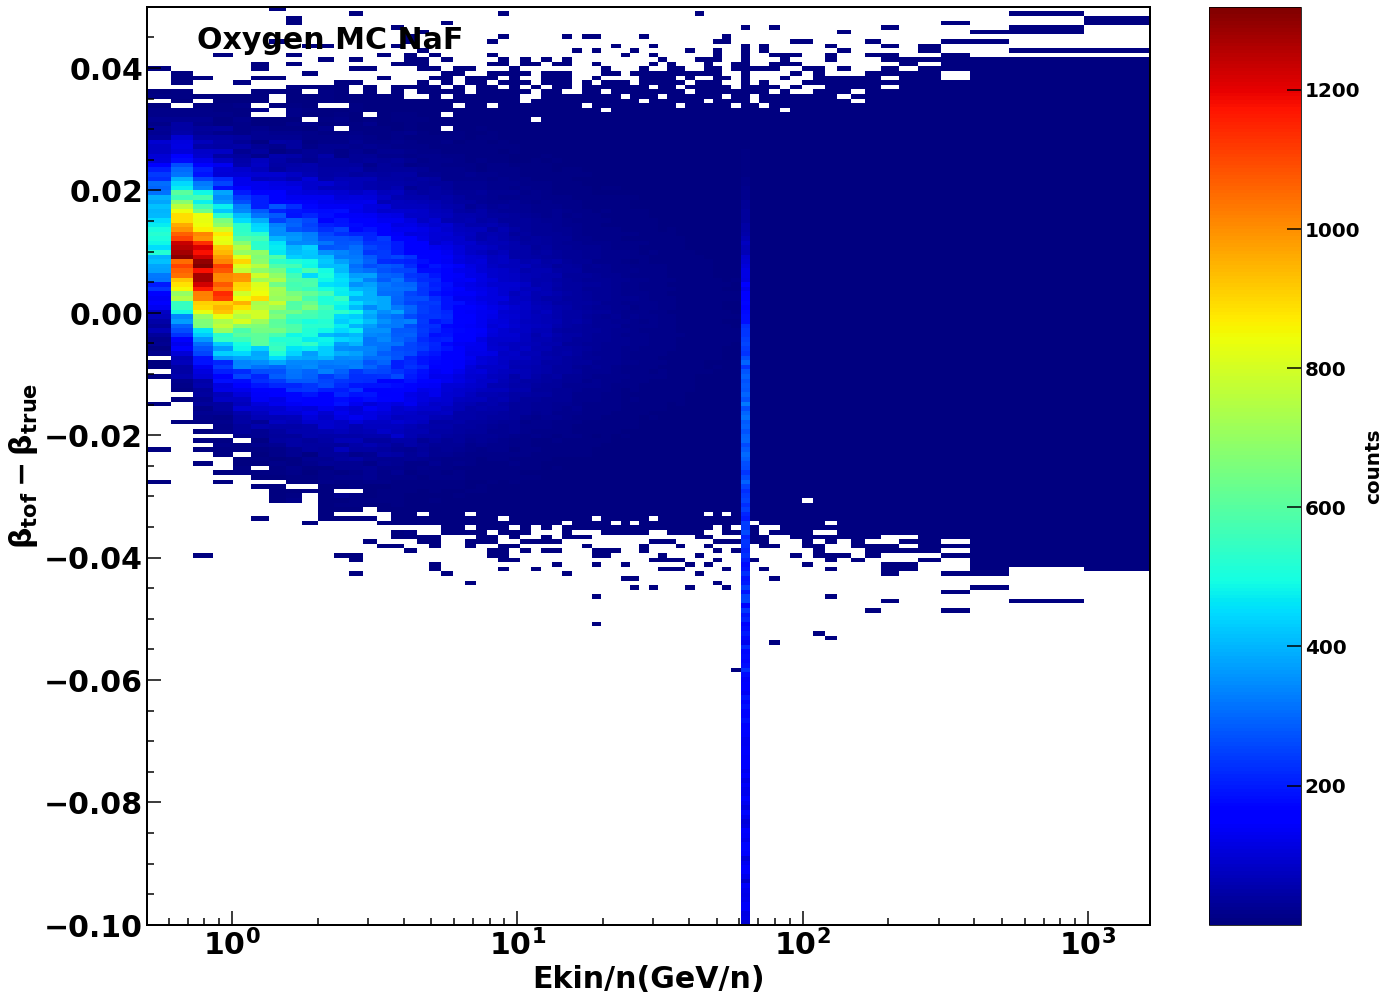

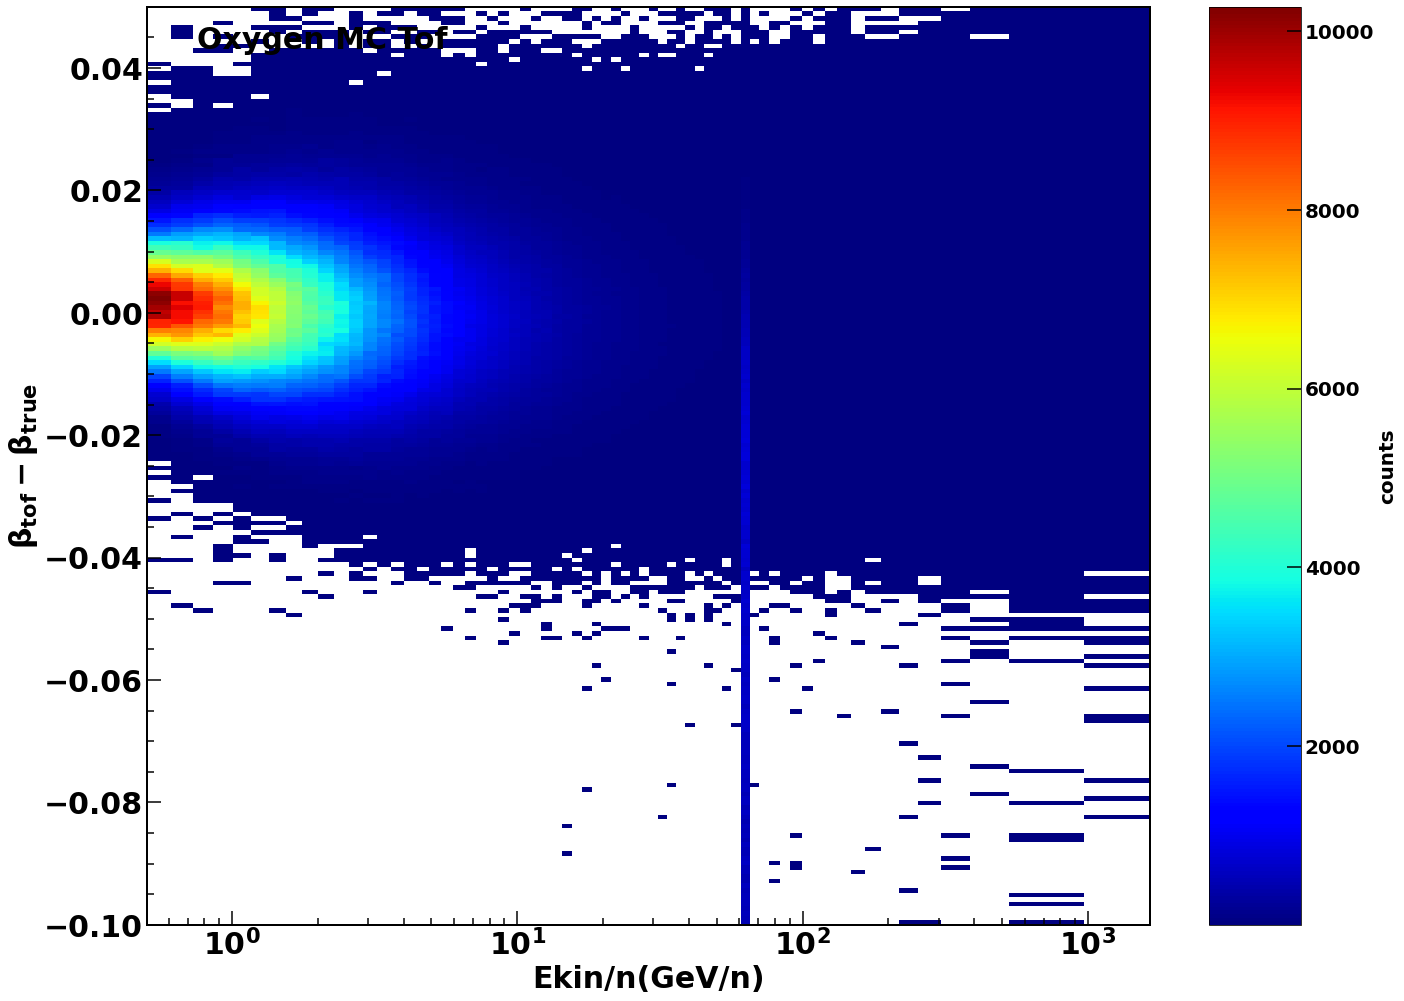

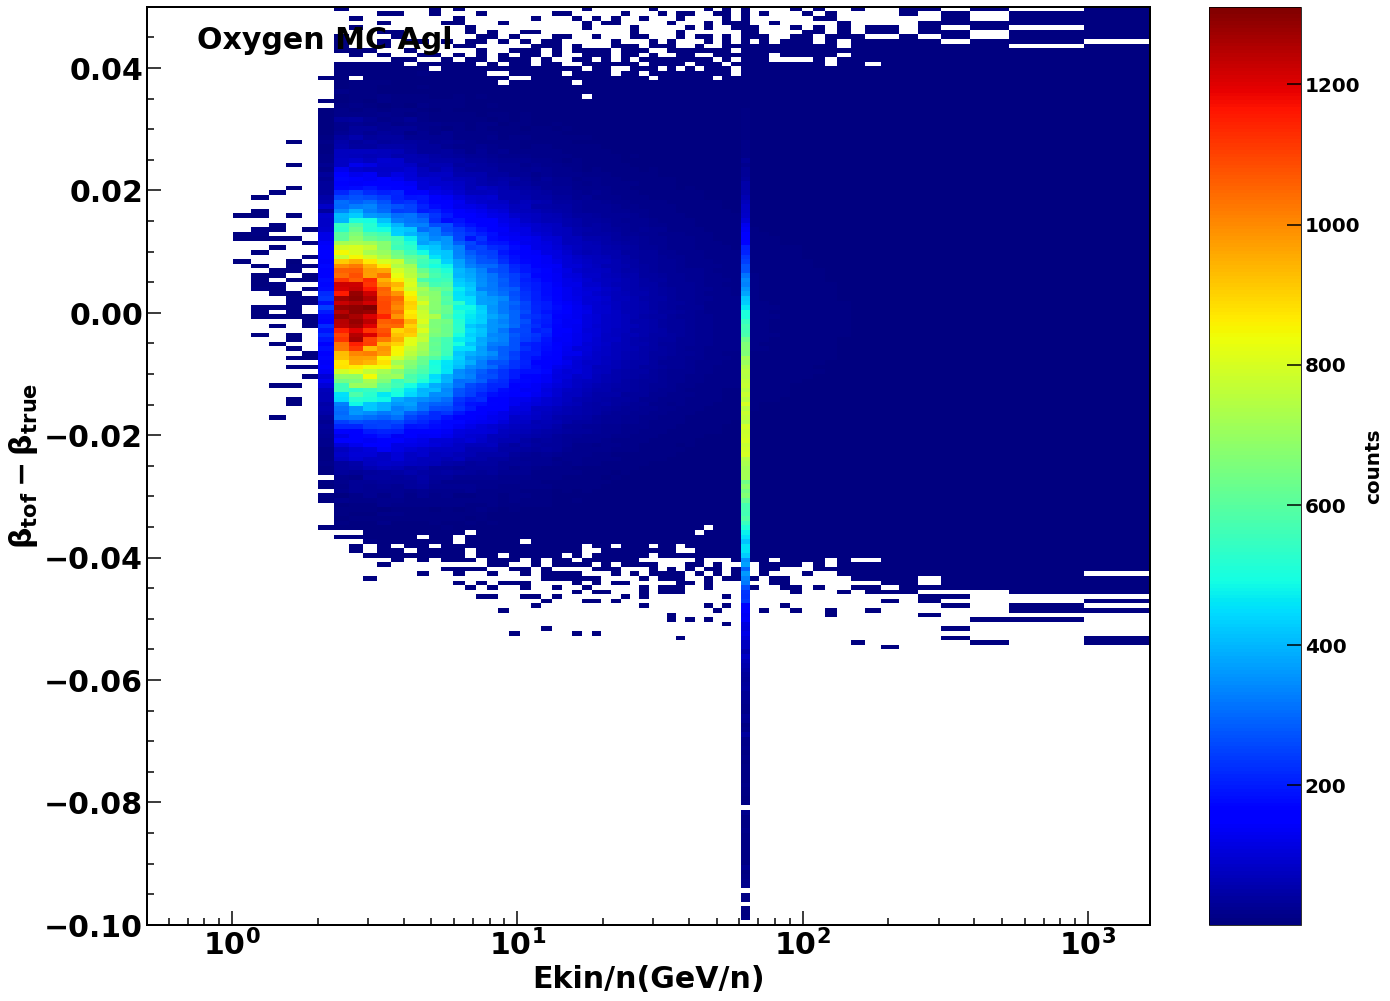

In [71]:
file_tofbeta1 = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_NaF_finebin.npz'
file_tofbeta2 = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_Agl_finebin.npz'
file_tofbeta3 = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBetaAtInnTrk_B1236P8_mcweight_finebin.npz'


datatype = {'iss', 'mc'}
refGeos = {'Tof', 'NaF', 'Agl'}
file_tofbeta = {'Tof': file_tofbeta3,
               'NaF': file_tofbeta1,
               'Agl':file_tofbeta2}

hist2d_mc_tofTrueGeo = {}
for refGeo in refGeos:
    with np.load(f'{file_tofbeta[refGeo]}') as npzfile:
        hist2d_mc_tofTrueGeo[refGeo] = WeightedHistogram.from_file(npzfile, f"hist_mcbetareso_mix_Tof")  
    
        fig = plt.figure(figsize=(20, 15))
        plot = fig.subplots(1, 1) 
        plot2dhist(fig, plot, xbinning=hist2d_mc_tofTrueGeo[refGeo].binnings[0].edges[1:-1], 
                   ybinning=hist2d_mc_tofTrueGeo[refGeo].binnings[1].edges[1:-1], 
                   counts=hist2d_mc_tofTrueGeo[refGeo].values[1:-1, 1:-1], 
                   xlabel=None, ylabel=None, zlabel="counts", zmin=None, zmax=None, 
                   setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False,  setlogz=False)  
        plot.text(0.05, 0.98, f"{nucleiname} MC {refGeo}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=plot.transAxes, color="black", fontweight="bold")          
        plot.set_xlabel(r"Ekin/n(GeV/n)", fontsize=30)                                                                                                                                                     
        plot.set_ylabel(r'$\mathrm{\beta_{tof} - \beta_{true}}$', fontsize=30)
        plot.set_xscale('log')
        #plot.set_xlim(gammalim[dec])
        savefig_tofile(fig, plotfile, f"hist2d_O16MC_betaResidual_{refGeo}Geo", show=True) 
 
  
                   

In [91]:
def get_musigma_gausfit(hist2d_mc_tofTrue, minbin, maxbin):
    energy_binvalues = hist2d_mc_tofTrue.binnings[0].bin_centers[minbin:maxbin]
    graph_mean_mcTofTrueReso = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))
    graph_sigma_mcTofTrueReso = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))

    for ip, ibin in enumerate(range(minbin, maxbin)):
   
        lowbinedge = hist2d_mc_tofTrue.binnings[0].edges[ibin]
        upbinedge = hist2d_mc_tofTrue.binnings[0].edges[ibin + 1]
        hist1d_mc = hist2d_mc_tofTrue.project(ibin) 
        hist1d_mc = hist1d_mc * (1/np.sum(hist1d_mc.values))
    
        xrange = [-0.03, 0.03]
        xbinrange = hist1d_mc.binnings[0].get_indices(xrange)
    
        xedges_mc = hist1d_mc.binnings[0].edges[xbinrange[0]:xbinrange[1]+1]
        xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange[0]:xbinrange[1]]
        yvalue_mc = hist1d_mc.values[xbinrange[0]:xbinrange[1]]
        yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange[0]:xbinrange[1]])
        yvalueserr_mc[yvalueserr_mc==0] = 0.0001
   
        guess_gaus_mc = dict(norm=0.0005, mu=0.0005, sigma=0.007)

        par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)
        for key in guess_gaus_mc.keys():
            guess_gaus_mc[key] = par_mc[key]
    
        xrange_iter2mc = [guess_gaus_mc['mu'] - 2.0 * guess_gaus_mc['sigma'], guess_gaus_mc['mu'] + 2.0 * guess_gaus_mc['sigma']]
        xbinrange2mc = hist1d_mc.binnings[0].get_indices(xrange_iter2mc)
    
        xedges_mc = hist1d_mc.binnings[0].edges[xbinrange2mc[0]:xbinrange2mc[1]+1]
        xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange2mc[0]:xbinrange2mc[1]]
        yvalue_mc = hist1d_mc.values[xbinrange2mc[0]:xbinrange2mc[1]]
        yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange2mc[0]:xbinrange2mc[1]])
        yvalueserr_mc[yvalueserr_mc==0] = 0.0001
    
        par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)

        graph_mean_mcTofTrueReso.yvalues[ip] = par_mc['mu']
        graph_mean_mcTofTrueReso.yerrs[ip] = parerr_mc['mu']
        graph_sigma_mcTofTrueReso.yvalues[ip] = par_mc['sigma']
        graph_sigma_mcTofTrueReso.yerrs[ip] = parerr_mc['sigma']
                                                                                                                                                            
        fit_y_mc = normalized_gaussian(xvalue_mc, *par_mc) 
        draw = False
        plotp = [0, 1, 2, 3, 60, 61]
        if draw:
            figure, ax1 = plt.subplots(1, 1, figsize=(17, 14))
            plot_histogram_1d(ax1, hist1d_mc, style="mc", color=mccolor, label=None, scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False) 
            #ax1.legend()
            ax1.plot(xvalue_mc, fit_y_mc, '-', linewidth=3, color='blue')
            ax1.text(0.6, 0.98, f"[{lowbinedge:.2f}, {upbinedge:.2f}] GeV/n", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold") 
       
            ax1.set_ylim([0.0001, 0.1])
        
            ax1.text(0.03, 0.8, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.text(0.03, 0.75, f"$\\mu:$ {par_mc['mu']:.4f}$\\pm$ {parerr_mc['mu']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.text(0.03, 0.7, f"$\\sigma:$ {par_mc['sigma']:.4f}$\\pm$ {parerr_mc['sigma']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.set_ylabel('Normalized events')
            ax1.set_xlabel(r'$\mathrm{\beta_{tof}-\beta_{naf}}$')
            ax1.set_xlim([-0.07, 0.06])
            ax1.set_yscale('log')
            #savefig_tofile(figure, plotfile, f"hist1d_{figsuffix}_Compare_{ibin}_{nuclei}", show=True) 
    return graph_mean_mcTofTrueReso, graph_sigma_mcTofTrueReso 


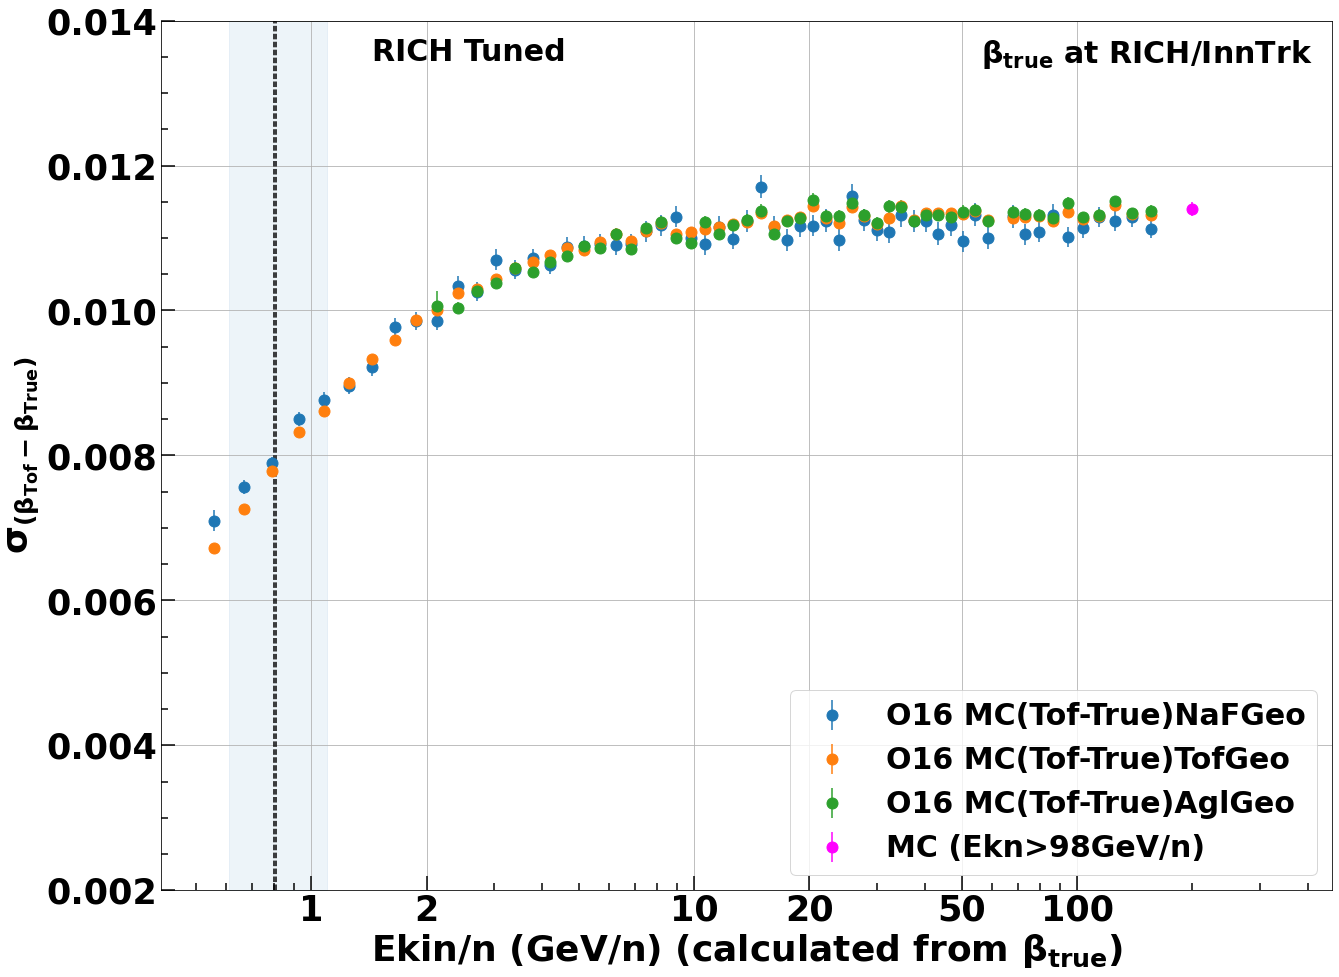

In [99]:

graph_mean_mcTofTrueResidual = {}
graph_sigma_mcTofTrueResidual = {}
minbin = {'Tof': 1, 'NaF': 1, 'Agl': 10}
maxbin = {'Tof': 60, 'NaF': 60, 'Agl': 60}
refGeos = {'Tof', 'NaF', 'Agl'}

for refGeo in refGeos:
    graph_mean_mcTofTrueResidual[refGeo], graph_sigma_mcTofTrueResidual[refGeo] = get_musigma_gausfit(hist2d_mc_tofTrueGeo[refGeo], minbin[refGeo], maxbin[refGeo])
    
    

fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
for refGeo in refGeos:
    plot_graph(fig, ax1, graph_sigma_mcTofTrueResidual[refGeo], color=DETECTOR_COLOR[refGeo],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{MCName} MC(Tof-True){refGeo}Geo')
    
    
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (Ekn>98GeV/n)')

ax1.set_ylim([0.002, 0.014])
    
    
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
#ax1.set_xticks(custom_ticks)
#ax1.set_xticklabels(custom_labels)
ax1.set_xscale('log')
ax1.set_xticks(custom_ticks)
ax1.set_xticklabels(custom_labels)
#ax1.legend()

ax1.axvline(x=0.81, color='black', linestyle='--')
ax1.axvline(x=0.8, color='black', linestyle='--')
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.1, alpha=0.08, color="tab:blue")
ax1.legend(loc='lower right', fontsize=30)
#ax2.set_xlabel('Ekin/n (GeV/n)')
ax1.set_ylabel('')
ax1.sharex(ax2)
ax1.set_xlabel(r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{true}}$)')
ax1.grid()
ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{True})}}$')
ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ RICH/InnTrk}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.18, 0.98, f"RICH {figtext}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}_compareTofResoTrue_Geo", show=True) 

    